## Project 2: House Pricing Prediction

Group: 8<br>
By : Ibrahim Al-zahrani , Mohammed Al-Ali and Rawan MohammedEid

<!-- ### MetaData -->
<!-- |Feature | Description|
|--------|-----------|
|MSSubClass |Identifies the type of dwelling involved in the sale.|
|MSZoning| Identifies the general zoning classification of the sale.|
|LotFrontage: | Linear feet of street connected to property|
|LotArea: |Lot size in square feet|
|Street: |Type of road access to property|
|Alley: |Type of alley access to property|
|LotShape: |General shape of property|
|LandContour: |Flatness of the property|
|Utilities: |Type of utilities available| -->

## Problem Statment

<p style="text-align:justify"> The house price is an important part to decide whether you live in or choose another one. Many businesses have worked in this domain. Also, the house prices have been affected by many factors like foundation and lot area. The aim of this project is to develop a model to predict the house price based on the historical data provided by Kaggle. Also, the model predicts the sale prices as a submission for Kaggle Competition.</p>

## Executive Summary

<p style="text-align:justify">This project focuses on data on house prices provided by Kaggle, which provides information about the house like year built, lot area, and house style. Currently, the quality of the building house has been increased in the last years. As a result, the house price did not rely on the building quality only that makes the house price estimation harder. So, the objective of this project is to predict the house price by considering the main factors. The project conducts on the data science process (Regression).</p>
Exploratory data analysis produces the findings:
<ol>
    <li>The 1904 has the highest avgerage of lot area by 26519 ft<sup>2</sup>.</li>
    <li>The sale price and overall quality are positively correlated by 0.79 which is strong.</li>
    <li>The split level of house style has sale prices between <span>&#36;</span>100,000 and &#36;200,000.</li>
</ol>

### Contents:
- [Data Load & Cleaning](#Data-Load-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Model Instantiation & Prediction](#Model-Instantiation-&-Prediction)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)
- [Kaggle Competition](#Kaggle-Competition)

## Load packages

In [327]:
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
pd.set_option('display.max_rows',None)
pd.set_option('display.max_column',None)
import warnings
warnings.filterwarnings("ignore")

## Load required sklearn packages.

In [365]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV

## Data Load and Cleaning
---
#### 1. Load House Prices Data
Load House Prices `train.csv` and `test.csv` from Kaggle into `DataFrames`.

In [3]:
train = pd.read_csv('../data-housepricing/train.csv')
test = pd.read_csv('../data-housepricing/test.csv')

#### 2. Display data

Print the first 5 rows of each dataframe in jupyter notebook

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


#### 3. How complete is the data?

Investigate missing values etc.

In [6]:
# Find the columns which have missing value
nan_columns = train.columns[train.isna().any()]

# Print the precentage of missing value in each column
(train[nan_columns].isna().sum().sort_values(ascending=False)/len(train))*100

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

As a result, we see the top 4 columns of missing value have more than 80% which most of values are missing so, we will reomve them from train dataset.

In [7]:
# Find the columns which have missing value
nan_columns = test.columns[test.isna().any()]

# Print the precentage of missing value in each column
(test[nan_columns].isna().sum().sort_values(ascending=False)/len(test))*100

PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
FireplaceQu     50.034270
LotFrontage     15.558602
GarageYrBlt      5.346127
GarageCond       5.346127
GarageQual       5.346127
GarageFinish     5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtQual         3.015764
BsmtFinType1     2.878684
BsmtFinType2     2.878684
MasVnrType       1.096642
MasVnrArea       1.028101
MSZoning         0.274160
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
Utilities        0.137080
Functional       0.137080
Exterior2nd      0.068540
Exterior1st      0.068540
SaleType         0.068540
BsmtFinSF1       0.068540
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
KitchenQual      0.068540
GarageCars       0.068540
GarageArea       0.068540
TotalBsmtSF      0.068540
dtype: float64

Also, the top 4 columns of missing values like in train dataset so, we will remove as well. The test dataset has columns more than train dataset which reqiured more work in data cleaning part.

#### 4. The data types
Display the data types of each feature. 

In [8]:
# Look at the information of the columns in train dataset:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The train dataset seems good in data type which there is no unexcepted data type in any columns.

In [9]:
# Look at the information of the columns in test dataset:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

Also, The test dataset seems good like the previous dataset which there is no unexcepted data type in any columns.

#### 5. Drop unnecessary columns

In [10]:
# Make copy of train and test dataset for cleaning process
train_a = train.copy()
test_a = test.copy()

# Drop the unnecessary columns 
train_a = train_a.drop(columns=['Id','PoolQC','MiscFeature','Alley','Fence'])
test_a = test_a.drop(columns=['Id','PoolQC','MiscFeature','Alley','Fence'])

We decied to remove the most missing value columns and the worthless column `Id`.

#### 6. Fill the missing values

In this part, we investigate the missing values by plot the disturbtion and see some missing record in both datasets. For the deciding, which is the best option to fill the missing values.

##### 6.a Define a custom function to subplot histograms 

In [367]:
def subplot_histograms(column_name):
    # Define two subplots
    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,5))

    # Assign the histogram of selected column in train dataset to the first subplot
    train[column_name].hist(ax=ax[0],grid=False,legend=True);

    # Assign the histogram of selected column in test dataset to the second subplot
    test[column_name].hist(ax=ax[1],grid=False,legend=True);

    # Assign the titles to subplots
    ax[0].set_title('Train dataset')
    ax[1].set_title('Test dataset')

    # Assign the ylabel to subplots
    ax[0].set_ylabel('Count')
    ax[1].set_ylabel('Count')
    plt.show()

##### 6.b The common missing values in datasets

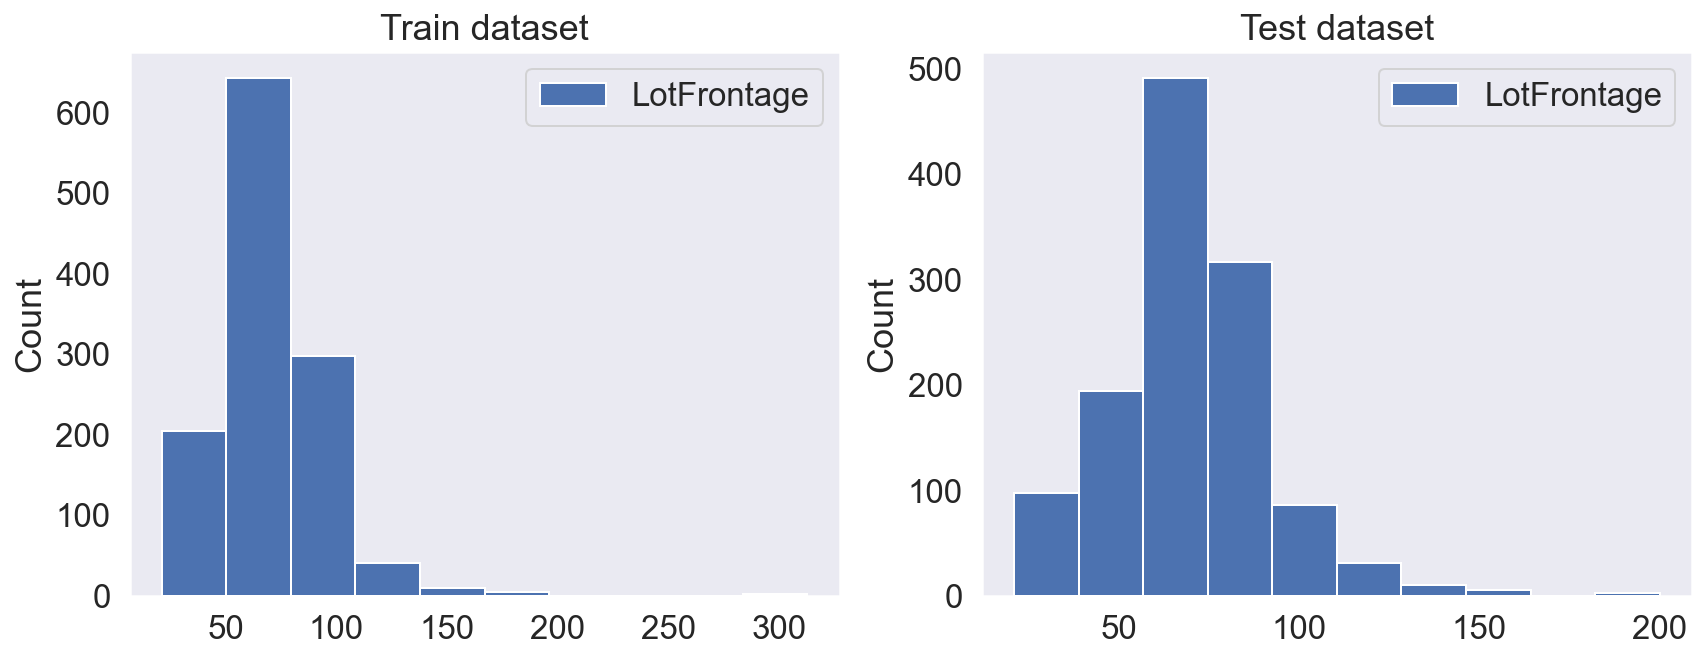

In [368]:
# Call function to draw histgram of LotFrontage
subplot_histograms('LotFrontage')

In [12]:
# Show records of the missing values in lot frontage of train dataset
train[train.LotFrontage.isna()].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733,Unf,0,520,1253,GasA,TA,Y,SBrkr,1253,0,0,1253,1,0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1,352,TA,TA,Y,0,213,176,0,0,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,ALQ,668,204,1060,GasA,Ex,Y,SBrkr,1060,0,0,1060,1,0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,1,270,TA,TA,Y,406,90,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000


In [13]:
# Show records of the missing values in lot frontage of test dataset
test[test.LotFrontage.isna()].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
40,1501,160,FV,NaN,2980,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,6,5,2000,2000,Gable,CompShg,MetalSd,MetalSd,BrkFace,1159.0,Gd,TA,PConc,Gd,TA,No,GLQ,466.0,Unf,0.0,290.0,756.0,GasA,Ex,Y,SBrkr,756,756,0,1512,1.0,0.0,2,1,2,1,Gd,5,Typ,0,NaN,Detchd,2000.0,Unf,2.0,440.0,TA,TA,Y,0,32,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
41,1502,160,FV,NaN,2403,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,244.0,Unf,0.0,286.0,530.0,GasA,Ex,Y,SBrkr,530,550,0,1080,0.0,0.0,2,1,2,1,Gd,4,Typ,0,NaN,Attchd,2003.0,RFn,2.0,496.0,TA,TA,Y,0,50,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
45,1506,20,RL,NaN,10456,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1967,1967,Hip,CompShg,HdBoard,HdBoard,BrkFace,120.0,TA,TA,CBlock,TA,TA,No,GLQ,506.0,Unf,0.0,1323.0,1829.0,GasA,Gd,Y,SBrkr,1829,0,0,1829,1.0,0.0,2,0,4,1,TA,8,Typ,0,NaN,Attchd,1967.0,RFn,2.0,535.0,TA,TA,Y,0,76,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
47,1508,50,RL,NaN,18837,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1.5Fin,6,5,1978,1978,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,PConc,Gd,TA,Mn,ALQ,687.0,LwQ,46.0,491.0,1224.0,GasA,TA,Y,SBrkr,1287,604,0,1891,0.0,1.0,3,0,3,1,TA,7,Typ,1,TA,Attchd,1978.0,RFn,2.0,678.0,TA,TA,Y,0,69,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [14]:
# Replace the missing value in lot frontage in both dataset with their median
train_a.LotFrontage.fillna(train_a.LotFrontage.median(),inplace=True)
test_a.LotFrontage.fillna(test_a.LotFrontage.median(),inplace=True);

Based on the distribution of feature and the nature of missing values, we have filled by the median.

<br>

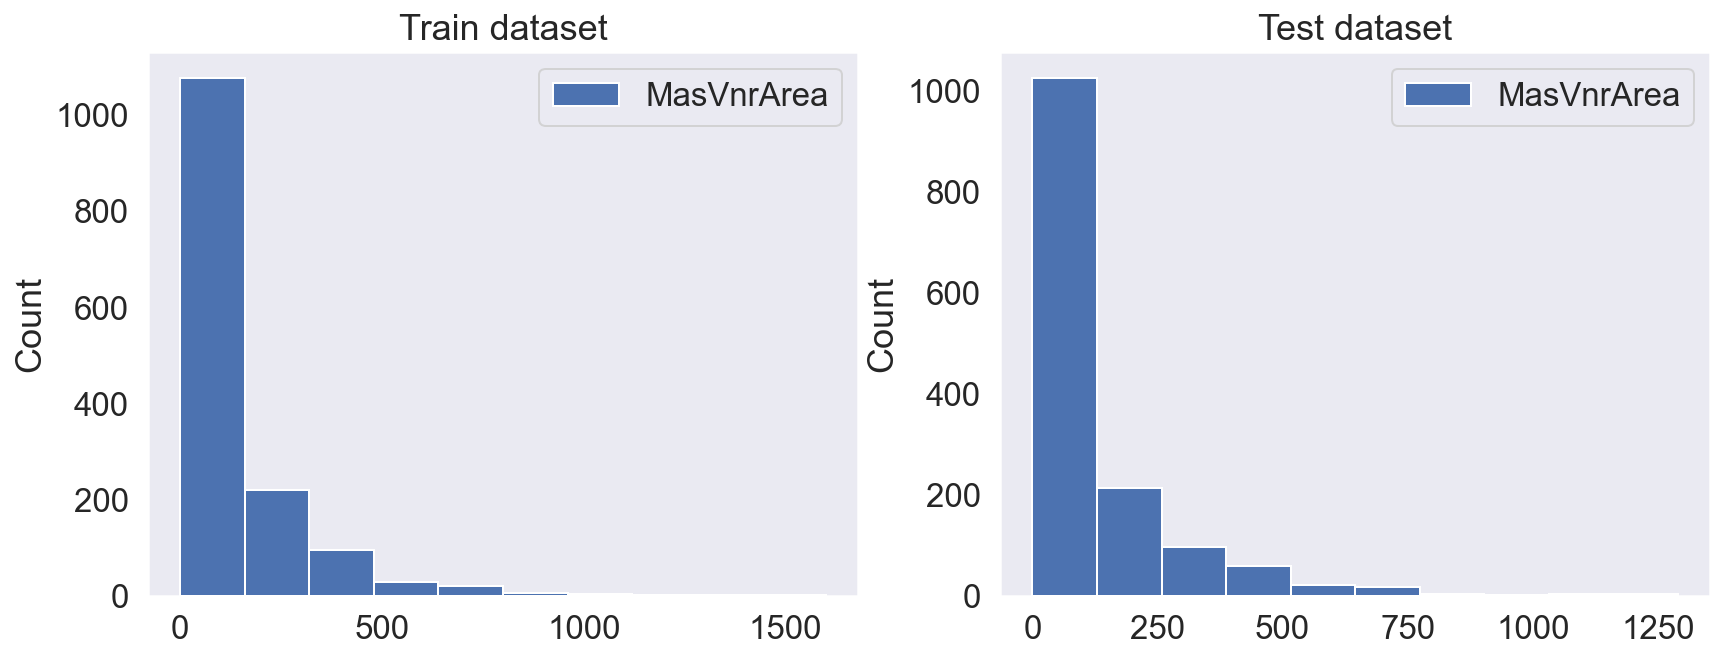

In [369]:
# Call function to draw histgram of MasVnrArea
subplot_histograms('MasVnrArea')

In [16]:
# Show records of the missing values in MasVnrArea of train dataset
train[train.MasVnrArea.isna()].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
529,530,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
936,937,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,Ex,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2003.0,RFn,2,555,TA,TA,Y,0,41,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
973,974,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,GasA,Ex,Y,SBrkr,1428,0,0,1428,0,0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2007.0,Fin,2,480,TA,TA,Y,0,120,0,0,0,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000


In [17]:
# Show records of the missing values in MasVnrArea of test dataset
test[test.MasVnrArea.isna()].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
231,1692,60,RL,NaN,12891,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,651.0,Unf,0.0,219.0,870.0,GasA,Ex,Y,SBrkr,878,1126,0,2004,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Gd,BuiltIn,2002.0,Fin,3.0,644.0,TA,TA,Y,0,48,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
246,1707,20,FV,90.0,7993,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1436.0,1436.0,GasA,Ex,Y,SBrkr,1436,0,0,1436,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2008.0,Fin,2.0,529.0,TA,TA,Y,0,121,0,0,0,0,NaN,NaN,NaN,0,10,2009,New,Partial
422,1883,60,RL,70.0,8749,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,840.0,840.0,GasA,Ex,Y,SBrkr,840,885,0,1725,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2002.0,RFn,2.0,550.0,TA,TA,Y,0,48,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
532,1993,60,RL,NaN,7750,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,707.0,707.0,GasA,Ex,Y,SBrkr,707,707,0,1414,0.0,0.0,2,1,3,1,Gd,6,Typ,1,Gd,Attchd,2002.0,Fin,2.0,403.0,TA,TA,Y,100,35,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
544,2005,20,RL,87.0,10037,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Feedr,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,666.0,Unf,0.0,794.0,1460.0,GasA,Ex,Y,SBrkr,1460,0,0,1460,0.0,0.0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006.0,Fin,2.0,480.0,TA,TA,Y,0,20,0,0,0,0,NaN,NaN,NaN,0,8,2008,WD,Normal


In [18]:
# Replace the missing values in MasVnrArea in both dataset with 0.0 since their type not defined
train_a.MasVnrArea.fillna(0.0,inplace=True)
test_a.MasVnrArea.fillna(0.0,inplace=True)

# While the MasVnrType is missing and related with MasVnrArea, we relpace the missing with NA
train_a.MasVnrType.fillna('Na',inplace=True)
test_a.MasVnrType.fillna('Na',inplace=True);

Based on the distribution of features and the nature of missing values, we have filled by the global known (0.0 and Na). The feature are realted with each other.

<br>

##### 6.b The common missing values in datasets

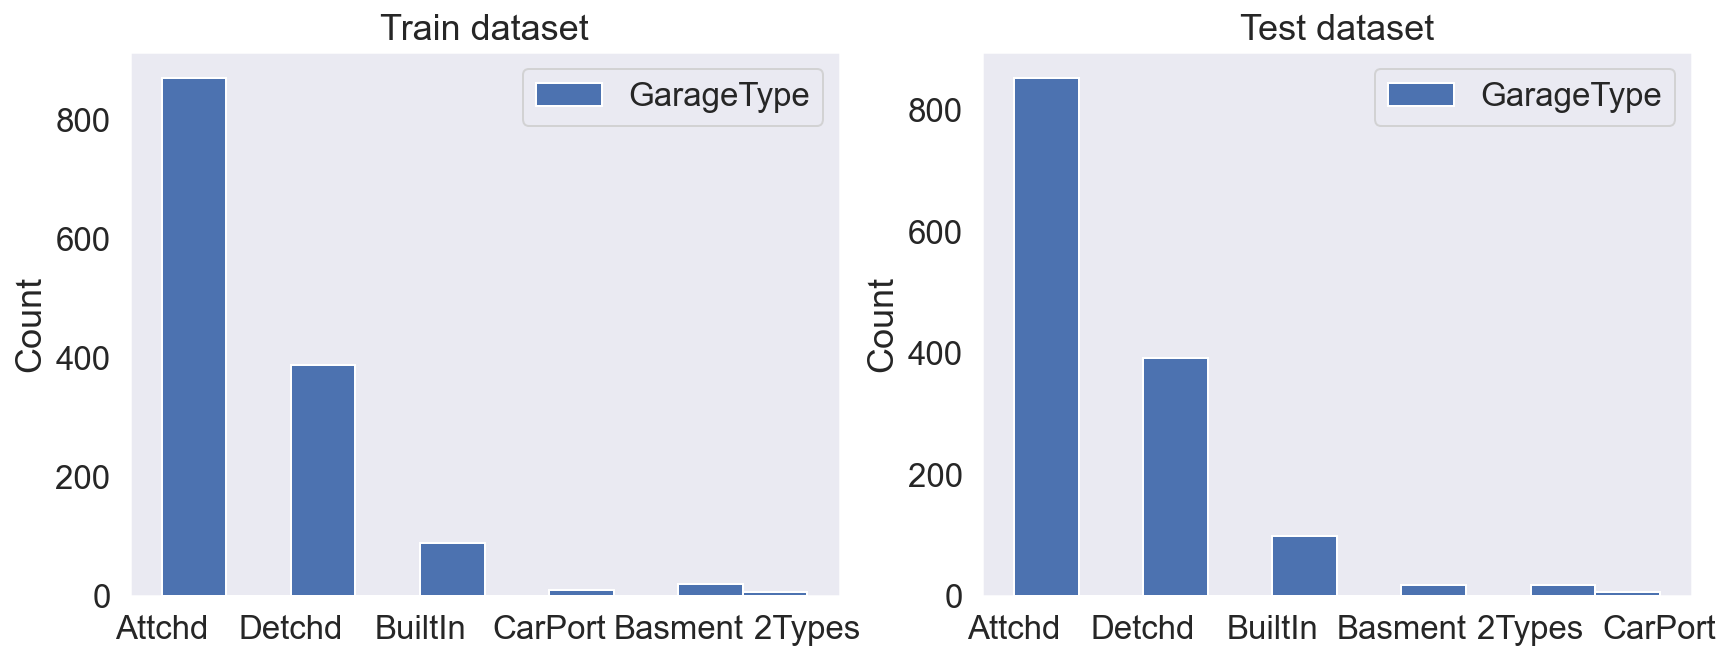

In [370]:
# Call function to draw histgram of GarageType
subplot_histograms('GarageType')

In [20]:
# Show records of the missing values in GarageType of train dataset
train[train.GarageType.isna()].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,40,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,736,736,GasA,Gd,Y,SBrkr,736,716,0,1452,0,0,2,0,2,3,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,102,0,0,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
78,79,90,RL,72.0,10778,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1768,1768,GasA,TA,N,SBrkr,1768,0,0,1768,0,0,2,0,4,2,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,136500
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,1013,GasA,TA,N,SBrkr,1013,0,513,1526,0,0,1,0,2,1,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,156,0,0,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
89,90,20,RL,60.0,8070,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,588,Unf,0,402,990,GasA,Ex,Y,SBrkr,990,0,0,990,1,0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,123600


In [21]:
# Show records of the missing values in GarageType of test dataset
test[test.GarageType.isna()].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
53,1514,90,RL,98.0,13260,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,6,1962,2001,Hip,CompShg,HdBoard,HdBoard,BrkFace,144.0,TA,TA,CBlock,TA,TA,No,BLQ,1500.0,Unf,0.0,228.0,1728.0,GasA,TA,Y,SBrkr,1728,0,0,1728,2.0,0.0,2,0,6,2,TA,10,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2010,Oth,Abnorml
71,1532,30,RM,56.0,4485,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,7,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,No,BLQ,579.0,Unf,0.0,357.0,936.0,GasA,TA,Y,SBrkr,936,0,0,936,1.0,0.0,1,0,2,1,TA,5,Typ,1,Gd,NaN,NaN,NaN,0.0,0.0,NaN,NaN,P,51,0,135,0,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal
79,1540,190,RM,100.0,9045,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,5,3,1910,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Fa,BrkTil,TA,TA,Mn,Unf,0.0,Unf,0.0,840.0,840.0,Grav,Fa,N,FuseF,1128,1128,0,2256,0.0,0.0,2,0,4,2,Fa,12,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,18,18,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Abnorml
92,1553,70,RM,60.0,12900,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,6,8,1912,2009,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,TA,No,Unf,0.0,Unf,0.0,780.0,780.0,GasA,Ex,Y,SBrkr,780,780,0,1560,0.0,0.0,1,1,3,1,Gd,7,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,344,0,0,0,168,0,NaN,NaN,NaN,0,5,2010,WD,Normal
96,1557,190,RL,60.0,9900,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,2fmCon,1.5Fin,5,4,1915,1950,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,Fa,Fa,BrkTil,TA,TA,No,Rec,1026.0,Unf,0.0,186.0,1212.0,GasA,TA,N,SBrkr,1212,180,0,1392,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,168,0,0,0,NaN,NaN,NaN,0,2,2010,ConLD,Normal


In [22]:
# Replace the missing values in GarageType and related columns in both dataset with 0.0 for numerical and NA for non-numerical
# Because the missing values of related columns have same records of GarageType missing values
train_a.GarageYrBlt.fillna(0.0,inplace=True)
test_a.GarageYrBlt.fillna(0.0,inplace=True)
train_a.GarageType.fillna('NA',inplace=True)
test_a.GarageType.fillna('NA',inplace=True)
train_a.GarageFinish.fillna('NA',inplace=True)
test_a.GarageFinish.fillna('NA',inplace=True)
train_a.GarageQual.fillna('NA',inplace=True)
test_a.GarageQual.fillna('NA',inplace=True)
train_a.GarageCond.fillna('NA',inplace=True)
test_a.GarageCond.fillna('NA',inplace=True)
test_a.GarageArea.fillna(0.0,inplace=True)
test_a.GarageCars.fillna(0.0,inplace=True);

Based on the distribution of features and the nature of missing values, we have filled by the global known (0.0 and Na). The feature are realted with each other.

<br>

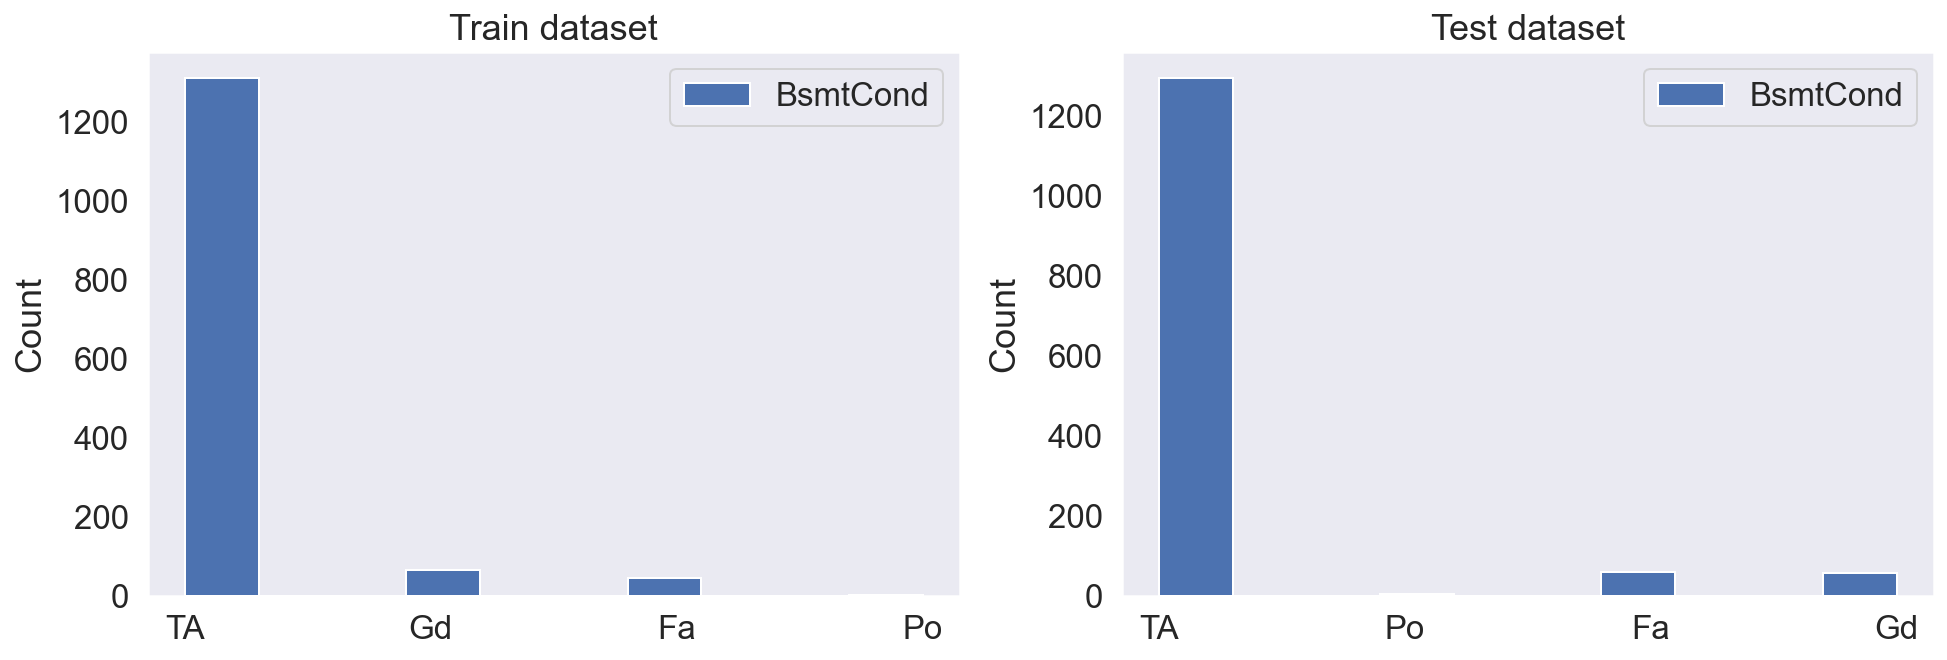

In [23]:
# Call function to draw histgram of BsmtCond
subplot_histograms('BsmtCond')

In [24]:
# Show records of the missing values in BsmtCond of train dataset
train[train.BsmtCond.isna()].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
39,40,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
90,91,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
102,103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
156,157,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500


In [25]:
# Show records of the missing values in BsmtCond of test dataset
test[test.BsmtCond.isna()].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
125,1586,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Edwards,Feedr,Norm,1Fam,1Story,3,6,1945,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,SBrkr,640,0,0,640,0.0,0.0,1,0,2,1,TA,5,Min1,0,NaN,Detchd,1945.0,Unf,1.0,240.0,TA,TA,N,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,ConLD,Normal
133,1594,90,RH,60.0,7200,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,Duplex,2Story,4,6,1967,1967,Flat,Tar&Grv,Plywood,CBlock,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,862,1788,0,2650,0.0,0.0,3,0,6,2,TA,10,Min2,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,2,2010,WD,Normal
269,1730,90,RL,75.0,8250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,2Story,6,7,1981,1981,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,964,918,0,1882,0.0,0.0,2,0,4,2,TA,8,Typ,2,TA,Attchd,1981.0,Unf,2.0,612.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
318,1779,20,RL,75.0,9533,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1953,1953,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,140.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,FuseA,1210,0,0,1210,0.0,0.0,1,1,2,1,TA,7,Typ,0,NaN,Attchd,1953.0,Fin,1.0,616.0,TA,TA,Y,208,0,100,0,0,0,NaN,MnPrv,NaN,0,8,2009,ConLD,Normal
354,1815,30,RM,50.0,5925,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1Story,2,4,1940,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,BrkTil,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Fa,N,FuseA,612,0,0,612,0.0,0.0,1,0,1,1,TA,4,Typ,0,NaN,Detchd,1965.0,Unf,1.0,308.0,TA,Fa,N,0,0,25,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal


In [26]:
# Replace the missing values in BsmtCond and related columns in both dataset with NA
# Because the missing values of related columns have same records of BsmtCond missing values
train_a.BsmtFinType1.fillna('NA',inplace=True)
test_a.BsmtFinType1.fillna('NA',inplace=True)

train_a.BsmtFinType2.fillna('NA',inplace=True)
test_a.BsmtFinType2.fillna('NA',inplace=True)

train_a.BsmtExposure.fillna('NA',inplace=True)
test_a.BsmtExposure.fillna('NA',inplace=True)

train_a.BsmtCond.fillna('NA',inplace=True)
test_a.BsmtCond.fillna('NA',inplace=True)

train_a.BsmtQual.fillna('NA',inplace=True)
test_a.BsmtQual.fillna('NA',inplace=True);  

Based on the distribution of features and the nature of missing values, we have filled by the global known (NA). The feature are realted with each other.

<br>

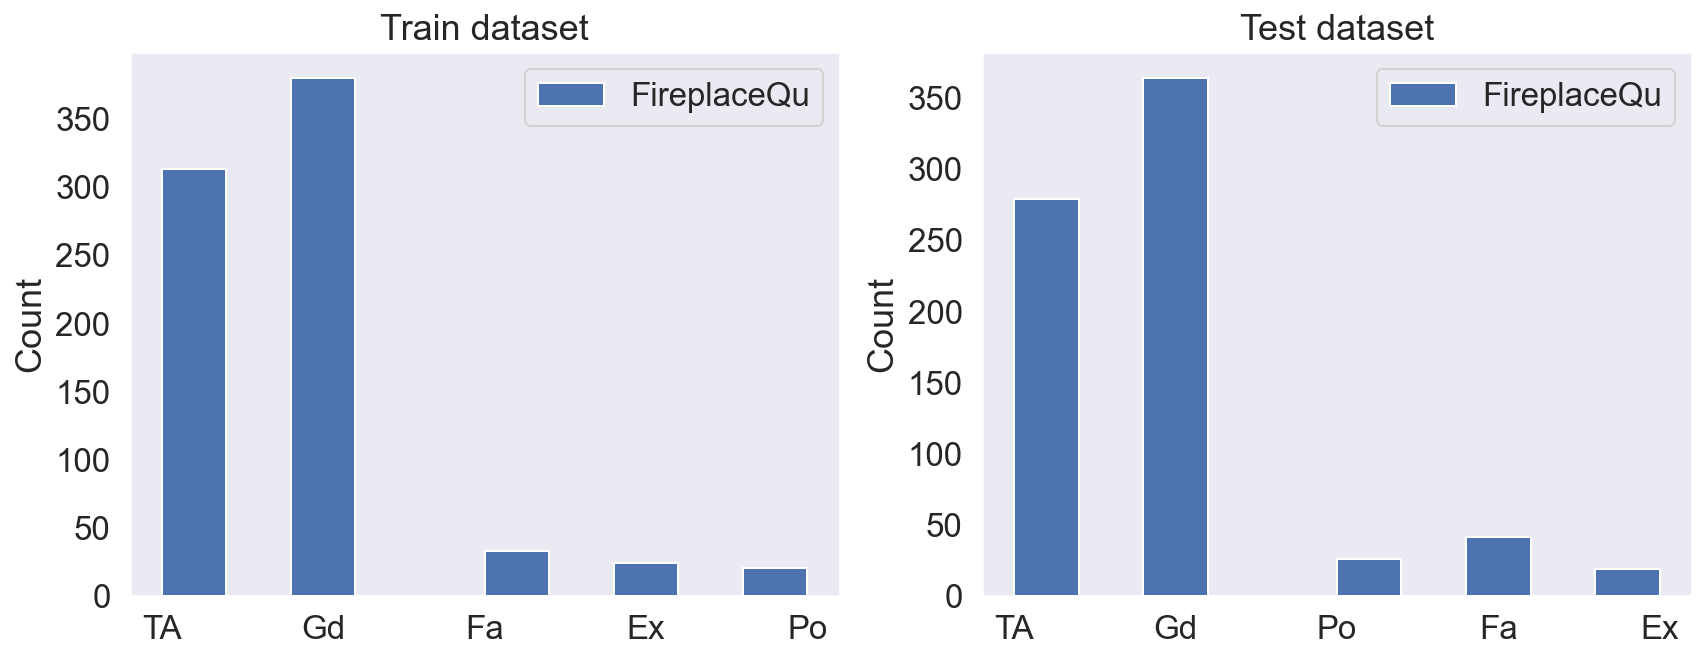

In [371]:
# Call function to draw histgram of BsmtCond
subplot_histograms('FireplaceQu')

<br>

In [31]:
# Define the dataframe that contains numercial columns
numeric_columns = train_a.select_dtypes(include=np.number)

# Drop the correlated columns as shown in part 7 of this section
numeric_columns.drop(columns=['GrLivArea','GarageYrBlt','GarageCars','OverallQual'],inplace=True)

# Merge the numercial columns with target column
train_firep = pd.concat([numeric_columns,train_a.FireplaceQu],axis=1)

# Assign the records of missing value of FireplaceQu to variable
fireplace_null = train_firep.loc[train_firep.FireplaceQu.isna()]

# Assign the records of non-missing value of FireplaceQu to variable
fireplace_true = train_firep.dropna(subset=['FireplaceQu'])

# Define the train set without target for model
X_train_firep = fireplace_true.drop('FireplaceQu',axis=1)

# Define the target values of train set for model
y_train_firep = fireplace_true.FireplaceQu

# Define the test set for model
X_test_firep = fireplace_null.drop('FireplaceQu',axis=1)

In [32]:
# Do Scaling for data
ss = StandardScaler()
Xs_train_firep = ss.fit_transform(X_train_firep)
Xs_test_firep = ss.transform(X_test_firep)

In [33]:
# Initialize the model
knn = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
knn.fit(Xs_train_firep, y_train_firep);

In [35]:
# Predicting for k = 3
y_pred_firep = knn.predict(X_test_firep)

# Define the dataframe that contain the filled FireplaceQu values
fireplace_filled = pd.DataFrame(y_pred_firep,columns=['FireplaceQu'],index=fireplace_null.index)

# Merge the filled FireplaceQu with missing FireplaceQu dataframe as column
fireplace_null = pd.concat([fireplace_null.drop('FireplaceQu',axis=1),fireplace_filled],axis=1)

In [36]:
# Merge the filled FireplaceQu dataframe with non-missing FireplaceQu dataframe by rows
fireplace_full = pd.concat([fireplace_null,fireplace_true],axis=0)

# Sorting the index of rows in dataframe
fireplace_full = fireplace_full.sort_index()

# Merge the completed FireplaceQu column with train datset as column
train_b = pd.concat([train_a.drop('FireplaceQu',axis=1),fireplace_full.FireplaceQu],axis=1)

Based on the distribution of feature and the nature of missing value, we have filled by using K-NN algorithm since the half of values are missed.

<br>

##### 6.c The missing values in train datasets

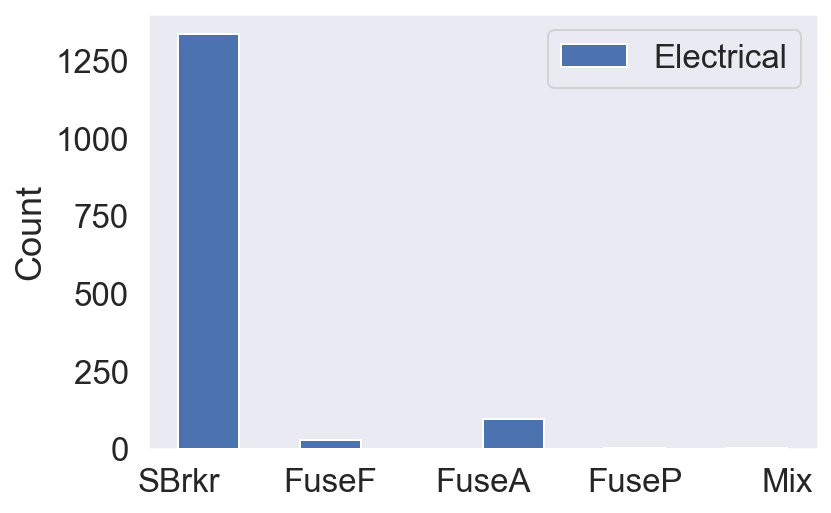

In [27]:
# Plot the histogram of Electrical in train dataset
train.Electrical.hist(grid=False,legend=True)

# Set ylable for histogram
plt.ylabel('Count');

In [28]:
# Show records of the missing values in Electrical of train dataset
train[train.Electrical.isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [29]:
# Replace the missing value in Electrical with most frequent value
train_a.Electrical.fillna('SBrkr',inplace=True);

Based on the distribution of feature and the nature of missing value, we have filled by the most frequent value.

<br>

##### 6.d The missing values in test dataset

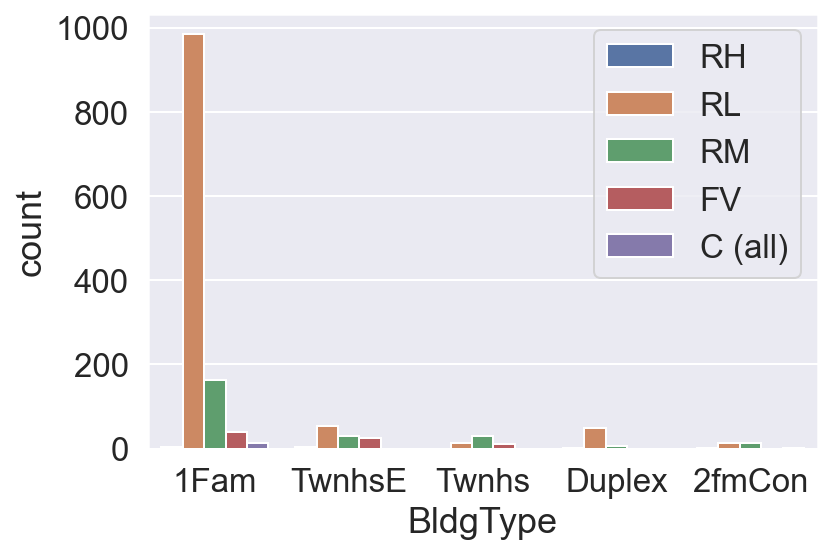

In [37]:
# Plot the count plot of MSZoning by BldgType in test dataset
sns.countplot(x="BldgType", hue="MSZoning", data=test)

# Assign location of lengend to the right corner
plt.legend(loc='upper right');

In [38]:
# Show records of the missing values in MSZoning of test dataset
test[test.MSZoning.isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
455,1916,30,NaN,109.0,21780,Grvl,NaN,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,NaN,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal
756,2217,20,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,NaN,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml
790,2251,70,NaN,NaN,56600,Pave,NaN,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5,1,1900,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,1150,686,0,1836,0.0,0.0,2,0,4,1,TA,7,Maj1,0,NaN,Detchd,1900.0,Unf,1.0,288.0,TA,Fa,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
1444,2905,20,NaN,125.0,31250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,1,3,1951,1951,Gable,CompShg,CBlock,VinylSd,None,0.0,TA,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,FuseA,1600,0,0,1600,0.0,0.0,1,1,3,1,TA,6,Mod,0,NaN,Attchd,1951.0,Unf,1.0,270.0,Fa,TA,N,0,0,135,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal


In [39]:
# Replace the missing value in MSZoning with the most frequent value
test_a.MSZoning.fillna('RL',inplace=True);

Based on the distribution of feature and the nature of missing value, we have filled by the most frequent value.

<br>

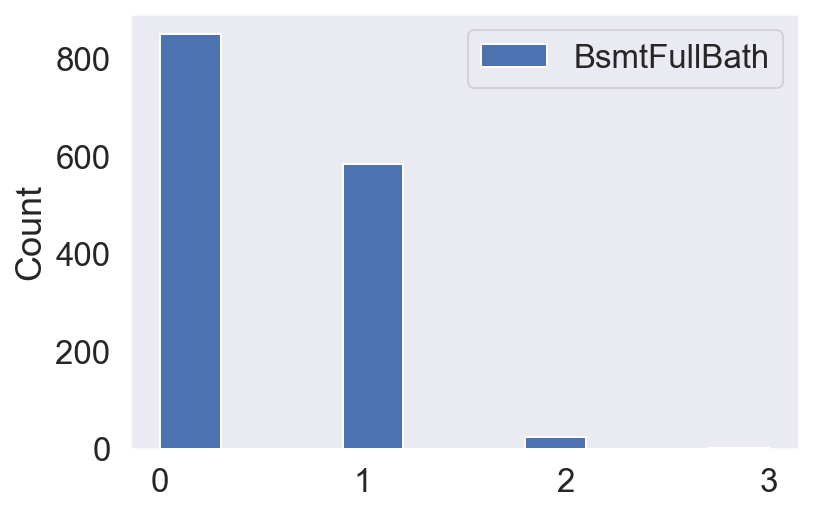

In [40]:
# Plot the histogram of BsmtFullBath in test dataset
test.BsmtFullBath.hist(grid=False,legend=True)

# Set ylable for histogram
plt.ylabel('Count');

In [41]:
# Show records of the missing values in BsmtFullBath of test dataset
test[test.BsmtFullBath.isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml
728,2189,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal


In [42]:
# Replace the missing value in BsmtFullBath and BsmtHalfBath with 0.0
test_a.BsmtFullBath.fillna(0.0,inplace=True)
test_a.BsmtHalfBath.fillna(0.0,inplace=True);

Based on the distribution of features and the nature of missing values, we have filled by the global known (0.0). The feature are realted with each other.

<br>

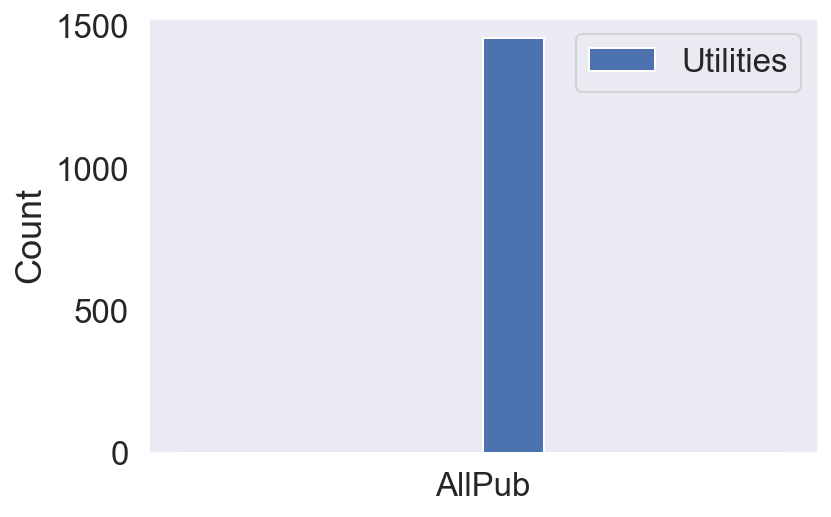

In [43]:
# Plot the histogram of Utilities in test dataset
test.Utilities.hist(grid=False,legend=True)

# Set ylable for histogram
plt.ylabel('Count');

In [44]:
# Show records of the missing values in Utilities of test dataset
test[test.Utilities.isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
455,1916,30,NaN,109.0,21780,Grvl,NaN,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,NaN,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal
485,1946,20,RL,NaN,31220,Pave,NaN,IR1,Bnk,NaN,FR2,Gtl,Gilbert,Feedr,Norm,1Fam,1Story,6,2,1952,1952,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1632.0,1632.0,GasA,TA,Y,FuseA,1474,0,0,1474,0.0,0.0,1,0,3,1,TA,7,Min2,2,Gd,Attchd,1952.0,Unf,2.0,495.0,TA,TA,Y,0,0,144,0,0,0,NaN,NaN,Shed,750,5,2008,WD,Normal


In [45]:
# Replace the missing value in Utilities with the most frequent value
test_a.Utilities.fillna('AllPub',inplace=True);

Based on the distribution of feature and the nature of missing value, we have filled by the most frequent value.

<br>

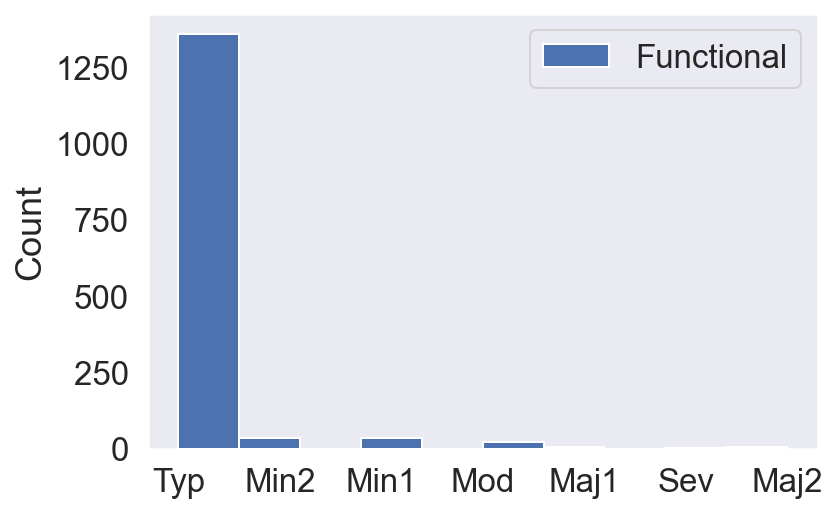

In [46]:
# Plot the histogram of Functional in test dataset
test.Functional.hist(grid=False,legend=True)

# Set ylable for histogram
plt.ylabel('Count');

In [47]:
# Show records of the missing values in Functional of test dataset
test[test.Functional.isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
756,2217,20,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,NaN,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml
1013,2474,50,RM,60.0,10320,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,4,1,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0.0,Unf,0.0,771.0,771.0,GasA,Fa,Y,SBrkr,866,504,114,1484,0.0,0.0,2,0,3,1,TA,6,NaN,0,NaN,Detchd,1910.0,Unf,1.0,264.0,TA,Fa,N,14,211,0,0,84,0,NaN,NaN,NaN,0,9,2007,COD,Abnorml


In [48]:
# Replace the missing value in Functional with the most frequent value
test_a.Functional.fillna('Typ',inplace=True);

Based on the distribution of feature and the nature of missing value, we have filled by the most frequent value.

<br>

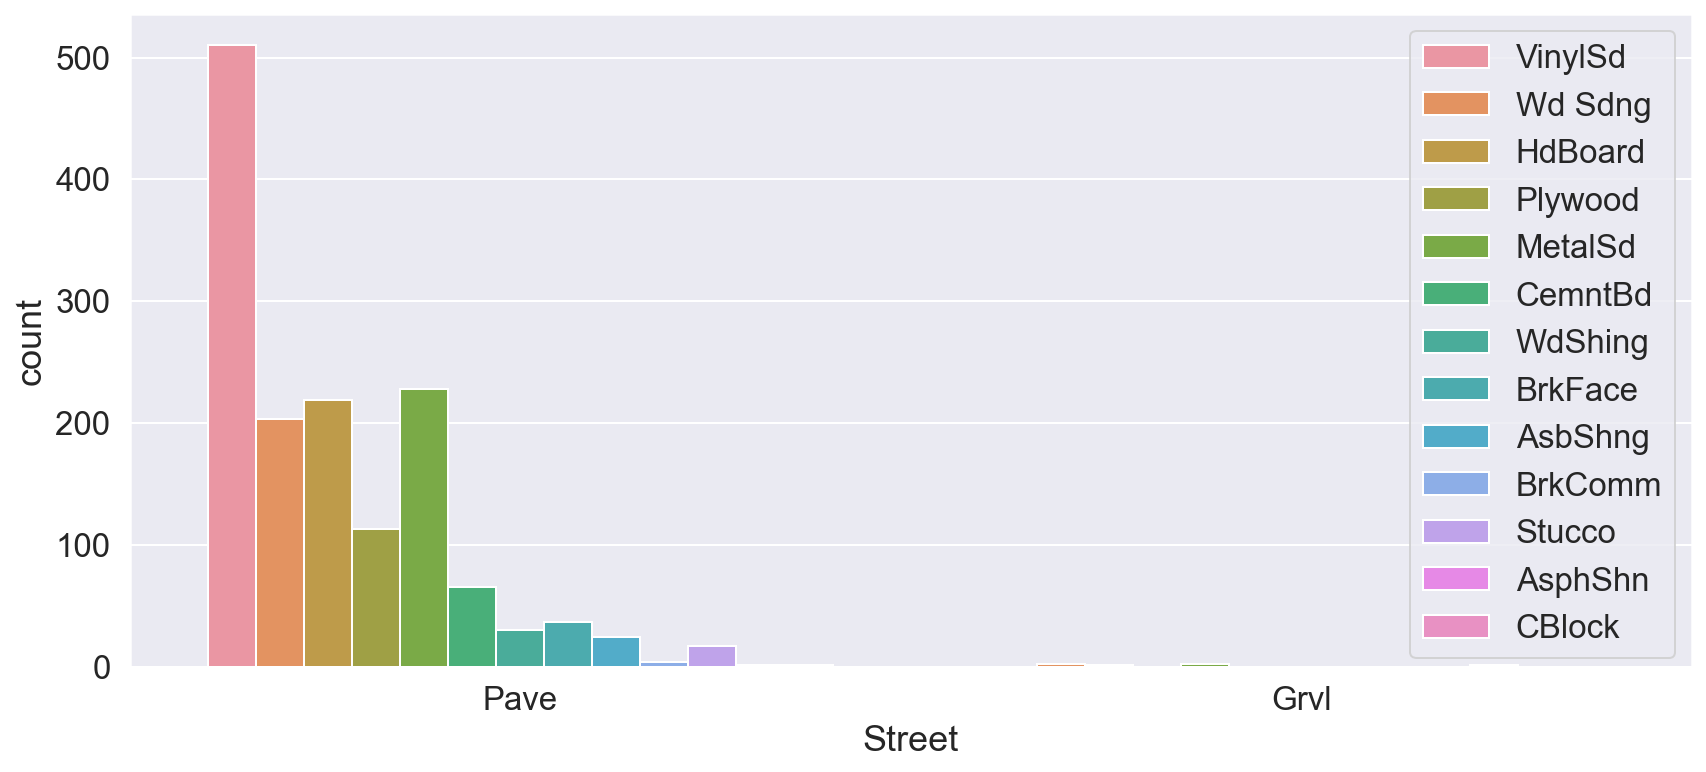

In [49]:
# Define the subplots with figsize
plt.subplots(figsize=(14,6))

# Plot the count plot of Exterior1st by Street in test dataset
sns.countplot(x="Street", hue="Exterior1st", data=test)

# Assign location of lengend to the right corner
plt.legend(loc='upper right');

In [50]:
# Show records of the missing values in Exterior1st of test dataset
test[test.Exterior1st.isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
691,2152,30,RL,85.0,19550,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1940,2007,Flat,Tar&Grv,NaN,NaN,None,0.0,TA,TA,PConc,TA,TA,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,GasA,Ex,Y,SBrkr,1518,0,0,1518,1.0,0.0,1,0,2,1,Fa,5,Typ,2,Gd,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,39,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [51]:
# Replace the missing value in Exterior1st with the most frequent value
test_a.Exterior1st.fillna('VinylSd',inplace=True);

Based on the distribution of feature and the nature of missing value, we have filled by the most frequent value.

<br>

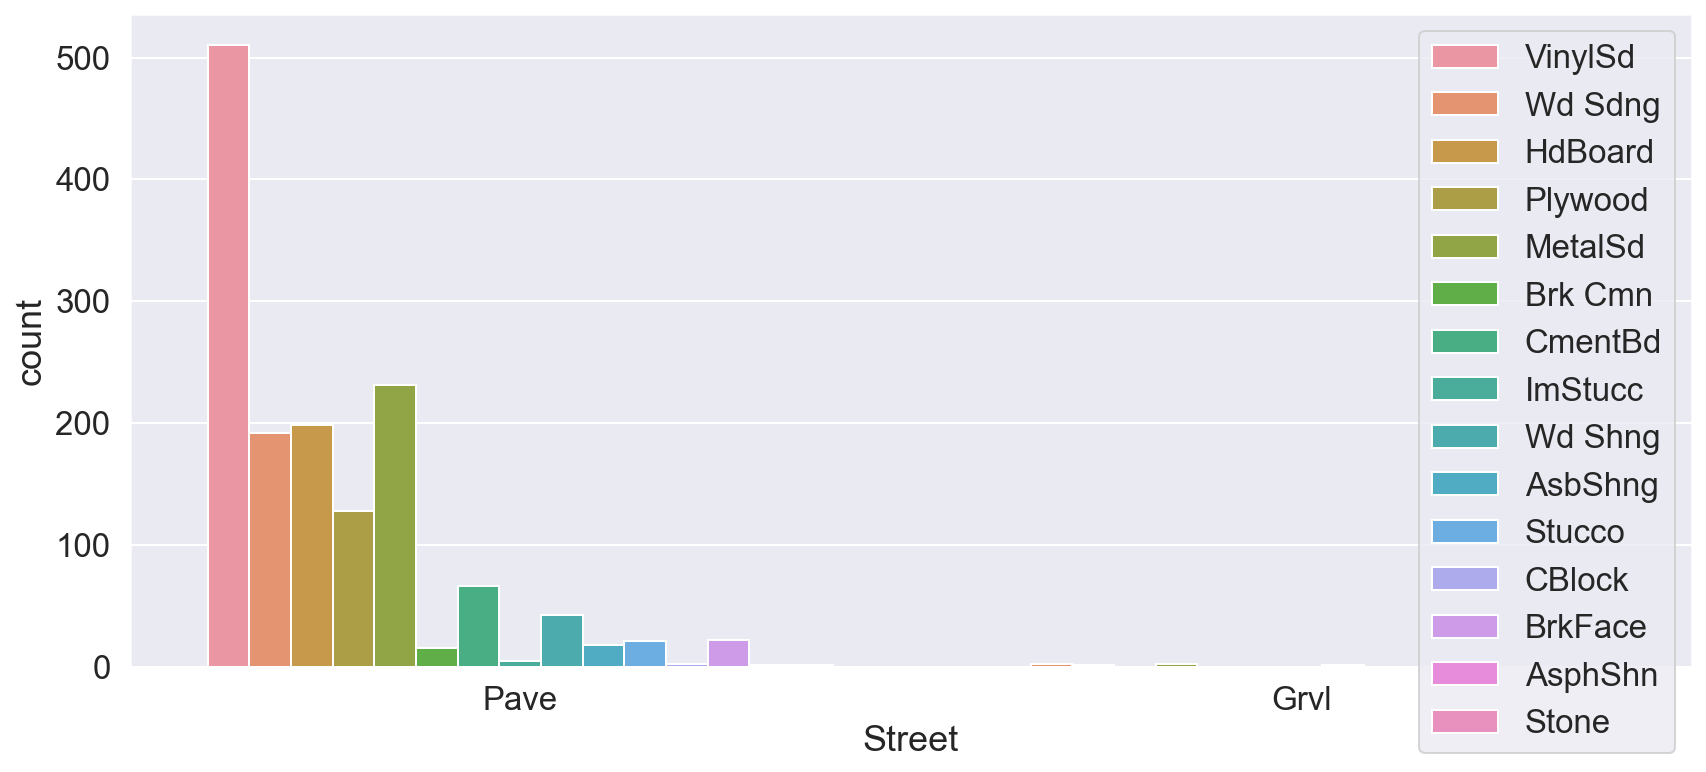

In [52]:
# Define the subplots with figsize
plt.subplots(figsize=(14,6))

# Plot the count plot of Exterior2nd by Street in test dataset
sns.countplot(x="Street", hue="Exterior2nd", data=test)

# Assign location of lengend to the right corner
plt.legend(loc='upper right');

In [53]:
# Replace the missing value in VinylSd with the most frequent value
test_a.Exterior2nd.fillna('VinylSd',inplace=True);

Based on the distribution of feature and the nature of missing value, we have filled by the most frequent value.

<br>

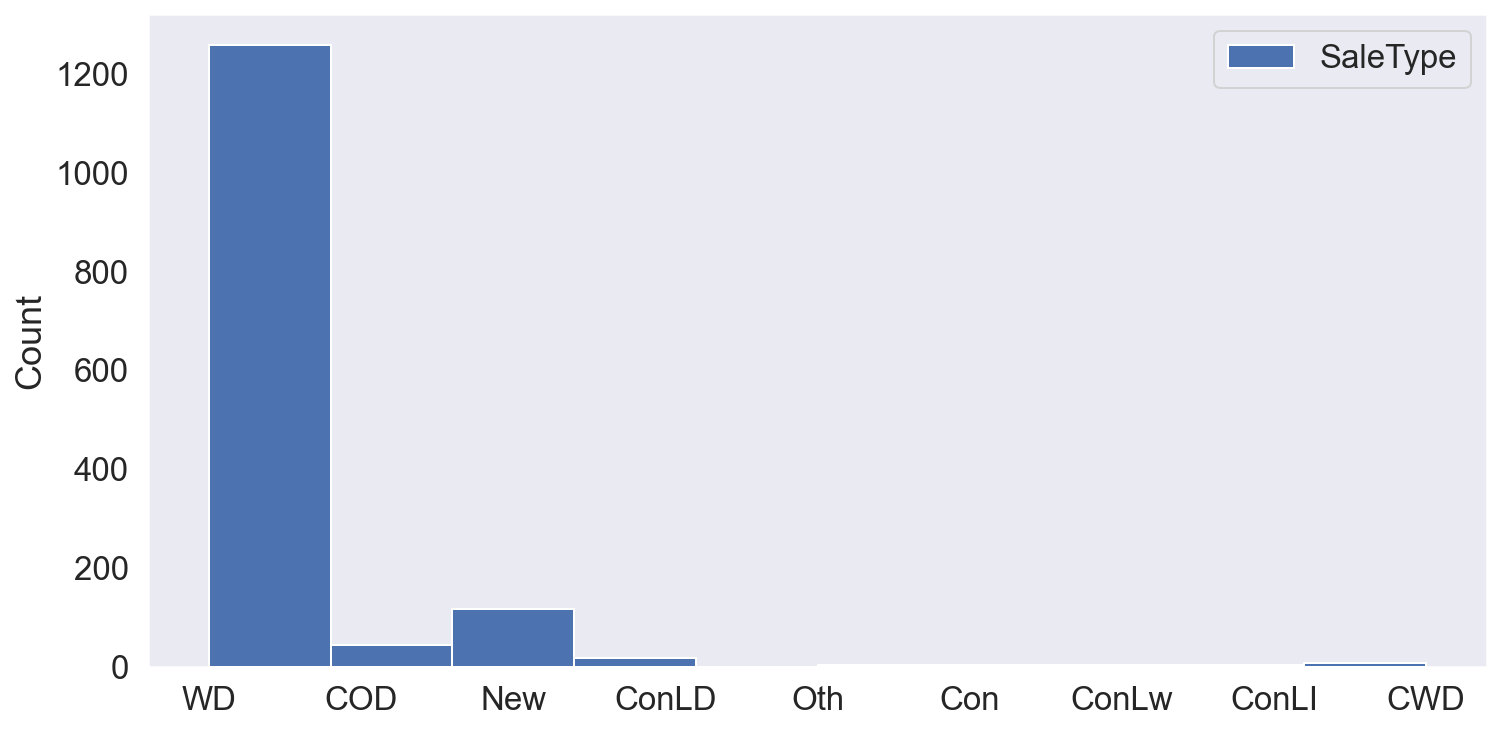

In [54]:
# Define the subplots with figsize
plt.subplots(figsize=(12,6))

# Plot the histogram of SaleType in test dataset
test.SaleType.hist(grid=False,legend=True)

# Set ylable for histogram
plt.ylabel('Count');

In [55]:
# Show records of the missing values in SaleType of test dataset
test[test.SaleType.isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1029,2490,20,RL,85.0,13770,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,6,1958,1998,Gable,CompShg,Plywood,Plywood,BrkFace,340.0,TA,TA,CBlock,TA,TA,Mn,Rec,190.0,BLQ,873.0,95.0,1158.0,GasA,TA,Y,SBrkr,1176,0,0,1176,1.0,0.0,1,0,3,1,TA,6,Typ,2,Gd,Attchd,1958.0,Unf,1.0,303.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2007,NaN,Normal


In [56]:
# Replace the missing value in SaleType with the most frequent value
test_a.SaleType.fillna('WD',inplace=True)

Based on the distribution of feature and the nature of missing value, we have filled by the most frequent value.

<br>

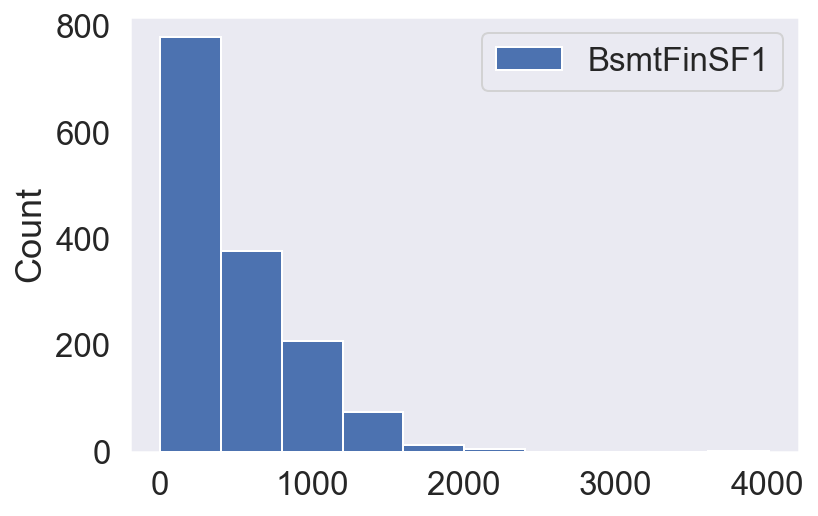

In [57]:
# Plot the histogram of BsmtFinSF1 in test dataset
test.BsmtFinSF1.hist(grid=False,legend=True)

# Set ylable for histogram
plt.ylabel('Count');

In [58]:
# Show records of the missing values in BsmtFinSF1 of test dataset
test[test.BsmtFinSF1.isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml


In [59]:
# Replace the missing value in BsmtFinSF1 and related columns with 0.0
test_a.BsmtFinSF1.fillna(0.0,inplace=True)
test_a.BsmtFinSF2.fillna(0.0,inplace=True)
test_a.BsmtUnfSF.fillna(0.0,inplace=True)
test_a.TotalBsmtSF.fillna(0.0,inplace=True);

Based on the distribution of features and the nature of missing values, we have filled by the global known (0.0). The feature are realted with each other.

<br>

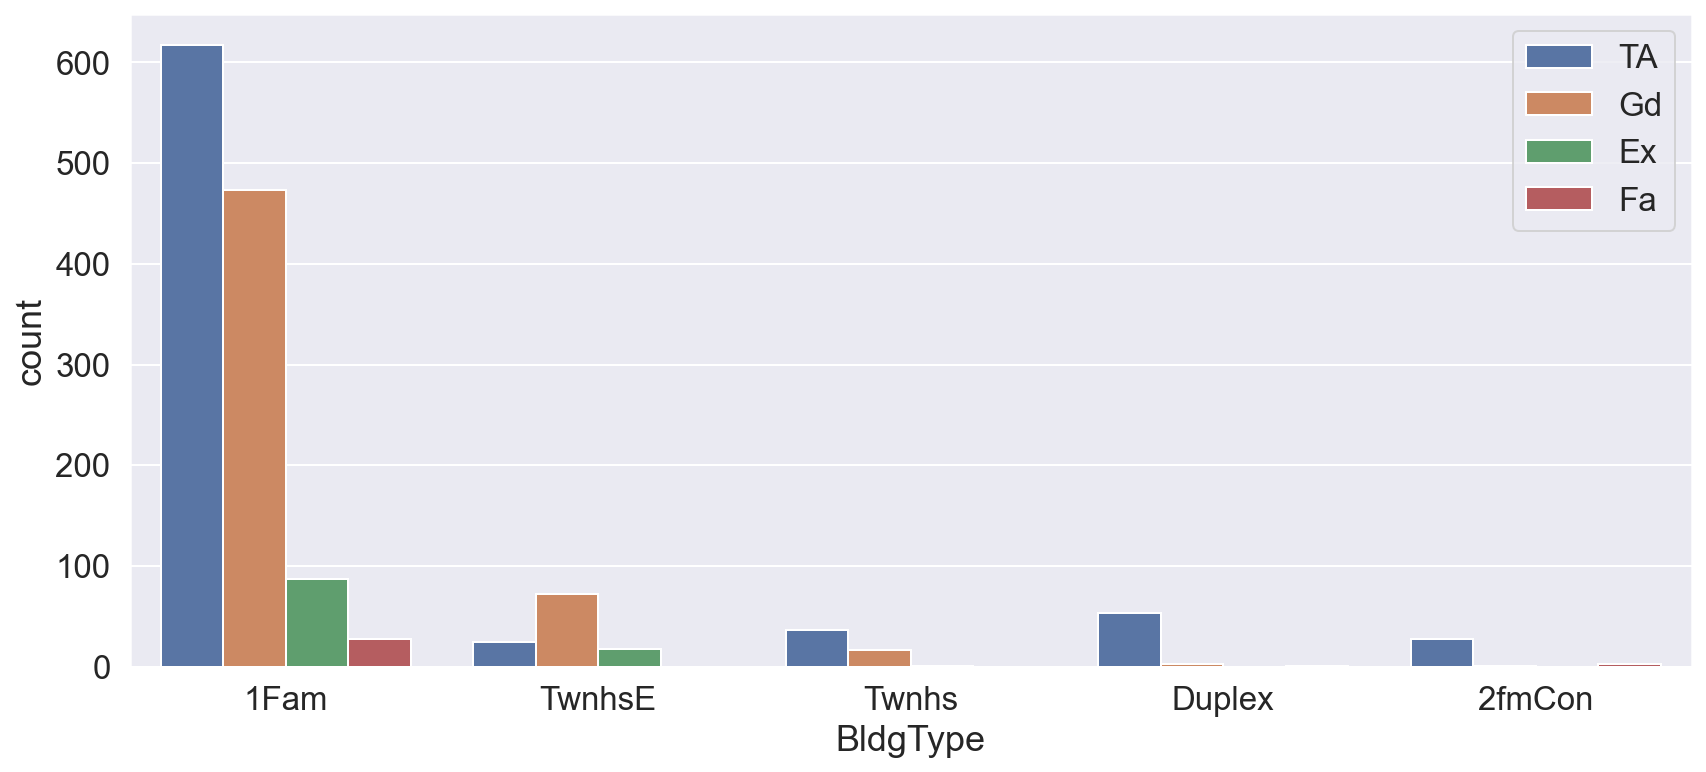

In [372]:
# Define the subplots with specific figsize
plt.subplots(figsize=(14,6))

# Plot the count plot of KitchenQual by BldgType in test dataset
sns.countplot(x="BldgType", hue="KitchenQual", data=test)

# Assign location of lengend to the right corner
plt.legend(loc='upper right');

In [61]:
# Show records of the missing values in KitchenQual of test dataset
test[test.KitchenQual.isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
95,1556,50,RL,72.0,10632,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,5,3,1917,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Gd,Fa,No,Unf,0.0,Unf,0.0,689.0,689.0,GasA,Gd,N,SBrkr,725,499,0,1224,0.0,0.0,1,1,3,1,NaN,6,Mod,0,NaN,Detchd,1917.0,Unf,1.0,180.0,Fa,Fa,N,0,0,248,0,0,0,NaN,NaN,NaN,0,1,2010,COD,Normal


In [62]:
# Replace the missing value in KitchenQual with the most frequent value
test_a.KitchenQual.fillna('TA',inplace=True);

Based on the distribution of feature and the nature of missing value, we have filled by the most frequent value.

<br>

In [64]:
# Define the dataframe that contains required columns
# Here we used the columns that used for filling FireplaceQu in train dataset
test_firep = test_a[train_firep.drop('SalePrice',axis=1).columns]

# Assign the records of missing value of FireplaceQu to variable
fireplace_null = test_firep.loc[test_firep.FireplaceQu.isna()]

# Assign the records of non-missing value of FireplaceQu to variable
fireplace_true = test_firep.dropna(subset=['FireplaceQu'])

# Define the train set without target for model
X_train_firep = fireplace_true.drop('FireplaceQu',axis=1)

# Define the target values of train set for model
y_train_firep = fireplace_true.FireplaceQu

# Define the test set for model
X_test_firep = fireplace_null.drop('FireplaceQu',axis=1)

In [65]:
# Do Scaling for data
ss = StandardScaler()
Xs_train_firep = ss.fit_transform(X_train_firep)
Xs_test_firep = ss.transform(X_test_firep)

In [66]:
# Initialize the model
knn = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
knn.fit(Xs_train_firep, y_train_firep);

In [67]:
# Predicting for k = 3
y_pred_firep = knn.predict(X_test_firep)

# Define the dataframe that contain the filled FireplaceQu values
fireplace_filled = pd.DataFrame(y_pred_firep,columns=['FireplaceQu'],index=fireplace_null.index)

# Merge the filled FireplaceQu with missing FireplaceQu dataframe as column
fireplace_null = pd.concat([fireplace_null.drop('FireplaceQu',axis=1),fireplace_filled],axis=1)

In [68]:
# Merge the filled FireplaceQu dataframe with non-missing FireplaceQu dataframe by rows
fireplace_full = pd.concat([fireplace_null,fireplace_true],axis=0)

# Sorting the index of rows in dataframe
fireplace_full = fireplace_full.sort_index()

# Merge the completed FireplaceQu column with train datset as column
test_b = pd.concat([test_a.drop('FireplaceQu',axis=1),fireplace_full.FireplaceQu],axis=1)

As we have did it in train dataset, we have filled by using K-NN algorithm since the half of values are missed.

<br>

#### 7.Multicollinearity

In this part, we investigate the correlation between the features by using `corr()` function in `pandas`. For the cleaning data, removes the strong correlated features to prevent the fact masking.

In [69]:
# Use corr() function to calculate the correlation between numerical columns
corr_matrix = train_a.corr()

# Change the format of correlation matrix from wide to long format
corr_matrix_unstack = corr_matrix.unstack()

# Sort the rows by correlation coefficient
corr_matrix_sort = corr_matrix_unstack.sort_values().reset_index()

# Show the strong positively correlated columns except the correlation with target
corr_matrix_sort[(corr_matrix_sort[0]>0.65) & (corr_matrix_sort[0]<1.0)&(corr_matrix_sort.level_0 != 'SalePrice')&(corr_matrix_sort.level_1 != 'SalePrice')]

,level_0,level_1,0
1318,TotRmsAbvGrd,BedroomAbvGr,0.676620
1319,BedroomAbvGr,TotRmsAbvGrd,0.676620
1320,2ndFlrSF,GrLivArea,0.687501
1321,GrLivArea,2ndFlrSF,0.687501
1326,1stFlrSF,TotalBsmtSF,0.819530
1327,TotalBsmtSF,1stFlrSF,0.819530
1328,TotRmsAbvGrd,GrLivArea,0.825489
1329,GrLivArea,TotRmsAbvGrd,0.825489
1330,GarageArea,GarageCars,0.882475
1331,GarageCars,GarageArea,0.882475


In [70]:
# Show the strong negatively correlated columns except the correlation with target
corr_matrix_sort[(corr_matrix_sort[0]<-0.65) & (corr_matrix_sort[0]>-1.0)&(corr_matrix_sort.level_0 != 'SalePrice')&(corr_matrix_sort.level_1 != 'SalePrice')]

,level_0,level_1,0


We decied to remove the high correlated columns which are `GarageCars`, `GrLivArea`, `TotalBsmtSF` and `TotRmsAbvGrd` .

<br>

#### 8. Distribution of Categorical Columns

In this part, we investigate the data distribution by plotting. For the cleaning data, removes the skewed features to uncover the optimisation opportunity.

In [71]:
# Define the dataframe which contains the categorical columns
categ_columns = train_b.select_dtypes(include=np.object).columns

# Define the list which contains the percentage of the most frequent value in each column
precent_list = [round(train_b[column].value_counts()[0]/len(train_b),3)*100 for column in categ_columns]

# Define the list which contains the most frequent value in each column
value_list = [train_b[column].value_counts().index[0] for column in categ_columns]

# Define the dataframe which contains the categorical columns and their most frequent value and percentage
high_frequent_df = pd.DataFrame({'Value':value_list,'Precentage' : precent_list},index=categ_columns)

# Show the columns which has repetition precentage of value more than %50
high_frequent_df[high_frequent_df.Precentage >= 50]

,Value,Precentage
MSZoning,RL,78.8
Street,Pave,99.6
LotShape,Reg,63.4
LandContour,Lvl,89.8
Utilities,AllPub,99.9
LotConfig,Inside,72.1
LandSlope,Gtl,94.7
Condition1,Norm,86.3
Condition2,Norm,99.0
BldgType,1Fam,83.6


In [72]:
# Define the list contains the columns name which have repetition precentage of value more than %50
biased_columns = high_frequent_df[high_frequent_df.Precentage >= 50].index.tolist()

# Define the list contains the columns name which have strong correlation
correlated_columns = ['GarageCars', 'GrLivArea', 'TotalBsmtSF', 'TotRmsAbvGrd']

# Combine the selected columns into one list
unwanted_columns = biased_columns+correlated_columns

# Remove the columns from both datasets
train_b.drop(columns=unwanted_columns,inplace=True)
test_b.drop(columns=unwanted_columns,inplace=True)

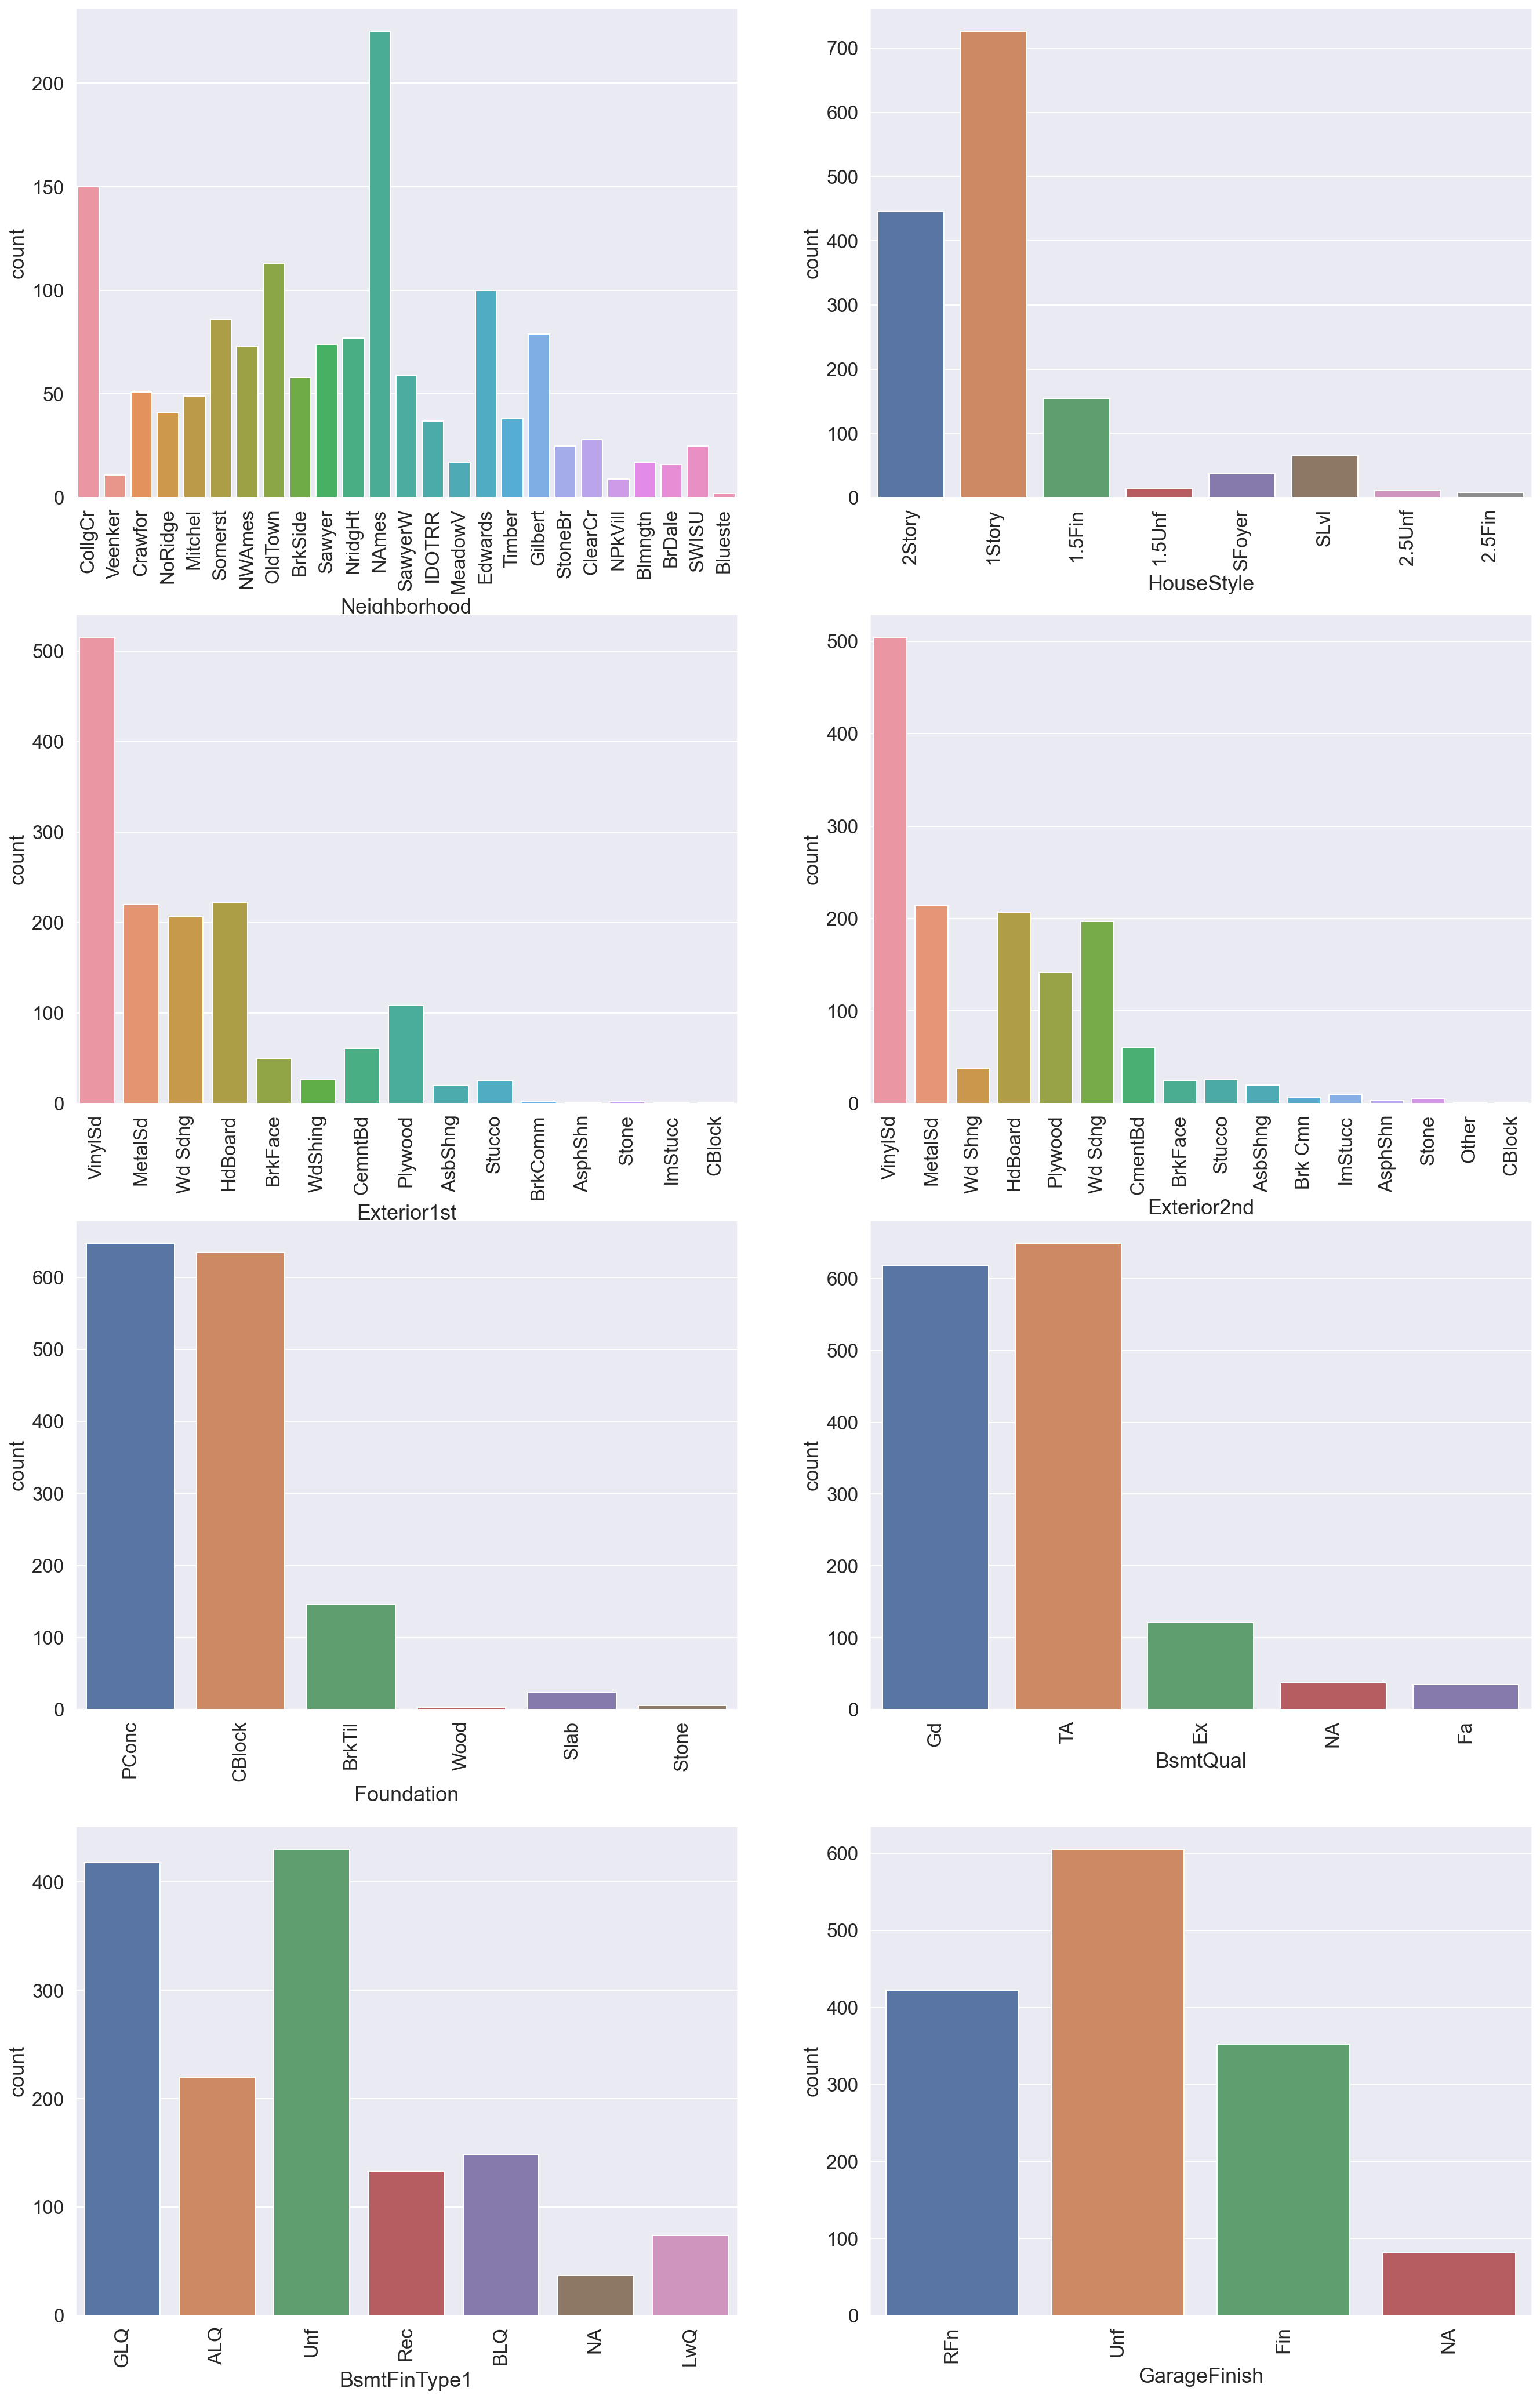

In [373]:
# Define subplots for categorical columns
fig, ax = plt.subplots(nrows=int(len(train_b.select_dtypes([np.object]).columns)/2),ncols=2,figsize=(20,30))

# Set padding between figures edge
fig.tight_layout(pad=7)

# Ravel turns a matrix into a vector, which is easier to iterate
ax = ax.ravel() 

for index,column in enumerate(train_b.select_dtypes([np.object]).columns):
    plot = sns.countplot(x=column,data=train_b,ax=ax[index]);
    # Rotate the x tick labels by 90 degree
    plt.setp(plot.get_xticklabels(), rotation=90)

We decied to choose those columns which are `Neighborhood`, `BsmtFinType1` and `GarageFinish` .

<br>

#### 9. Feature Selection

In this part, we select the best of feature set for modeling part by using decision tree algorithm. As a result, we will be reflacted in result of house price prediction.

In [80]:
# Do One Hot Encoding on Neighborhood, BsmtFinType1 and GarageFinish
Neighborhood_ = pd.get_dummies(train_b.Neighborhood,prefix='Neighborhood')
GarageFinish_ = pd.get_dummies(train_b.GarageFinish,prefix='GarageFinish')
BsmtFinType1_ = pd.get_dummies(train_b.BsmtFinType1,prefix='BsmtFinType1')

In [81]:
# Merge the numerical columns with categorical dummy columns in train dataset
train_c = pd.concat([train_b.select_dtypes(include=np.number),BsmtFinType1_,Neighborhood_,GarageFinish_],axis=1)

# Define X_train for modeling
X_train = train_c.drop(columns=['SalePrice'])

In [83]:
# selected_columns = ['Neighborhood','GarageFinish','BsmtFinType1']
Neighborhood_ = pd.get_dummies(test_b.Neighborhood,prefix='Neighborhood')
GarageFinish_ = pd.get_dummies(test_b.GarageFinish,prefix='GarageFinish')
BsmtFinType1_ = pd.get_dummies(test_b.BsmtFinType1,prefix='BsmtFinType1')

In [84]:
# Merge the numerical columns with categorical dummy columns in test dataset
test_c = pd.concat([test_b.select_dtypes(include=np.number),Neighborhood_,GarageFinish_,BsmtFinType1_],axis=1)

# Define X_test for modeling
X_test = test_c

In [85]:
# Do Scaling for data
ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)

# Define y_test for modeling
y_train = train_c.SalePrice

We have finished the part of preparing the datasets. The dummy variable has been used to convert categorical values to numerical as binary 1 or 0 for each group value.

In [339]:
# Initialize the model
dtr = DecisionTreeRegressor(random_state=1)

# Fitting the model
dtr.fit(Xs_train, y_train)

# Get importance
importance = dtr.feature_importances_

# Define the dataframe of column importance
df_feature_selected = pd.DataFrame({'Column Name':X_train.columns.tolist(),"Importance":importance.tolist()})

# Show the columns which have importance is more than 0.001
df_feature_selected[df_feature_selected.Importance >= 0.001].sort_values('Importance',ascending=False)

,Column Name,Importance
3,OverallQual,0.671442
12,2ndFlrSF,0.064146
11,1stFlrSF,0.044892
8,BsmtFinSF1,0.041484
22,GarageArea,0.035400
2,LotArea,0.028530
1,LotFrontage,0.013712
16,FullBath,0.009740
24,OpenPorchSF,0.009396
23,WoodDeckSF,0.008411


In [87]:
# Assign the columns which have importance is more than 0.001 as predictors of X_train_a and X_test_a
X_train_a = X_train[df_feature_selected[df_feature_selected.Importance >= 0.001]['Column Name'].values.tolist()]
X_test_a = X_test[df_feature_selected[df_feature_selected.Importance >= 0.001]['Column Name'].values.tolist()]

After feature selection, we have used the selected features as predictors for modeling part.

<h3>Exploratory Data Analysis</h3>

In this section, we discover the findings in both datasets in order to know how the sale price affected and features distributed.

#### 1. Summary Statistics (train dataset)

In [335]:
train_b.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1162.626712,346.992466,5.844521,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,0.613014,1868.739726,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,386.587738,436.528436,48.623081,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,0.644666,453.697295,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,882.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1958.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,1087.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,1.000000,1977.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1391.250000,728.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2001.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,4692.000000,2065.000000,572.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,3.000000,2010.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


The houses have huge difference in lot area since the range is more than 21,000 and the most of overall quality between 5-7. Also, the years sold of house are between 2006 and 2010, and months in the summer. The most of second floor areas are less than the first floor areas. The sale prices are positively skewed due to the raised prices compared with the rest.

#### 2. Find the realtion between Overall Quality and Sale Price. (train dataset)

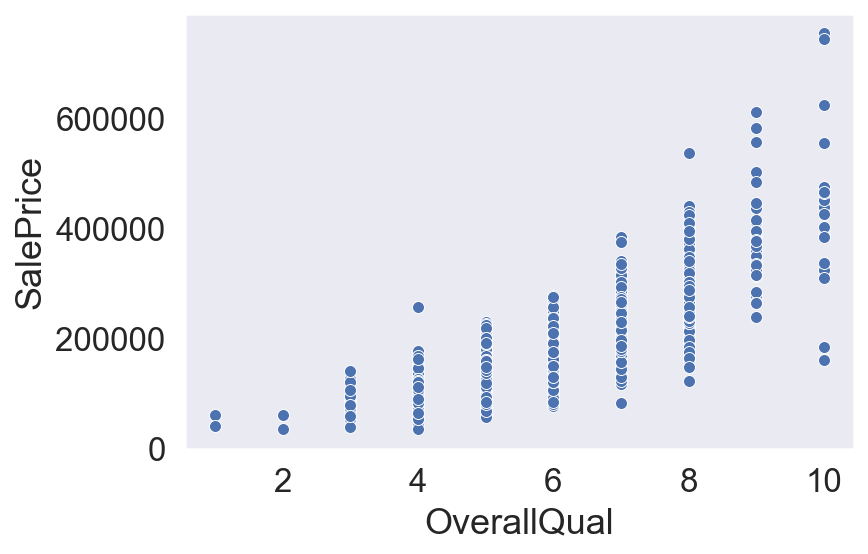

In [88]:
# Plot the scatter plot of OverallQual and SalePrice in train dataset
sns.scatterplot(x='OverallQual',y='SalePrice',data=train_b)

# Hide the grid in the plot
plt.grid(False)
plt.show();

As a plot has shown, we find that more overall quality leads to more sale price.

#### 3. How the sale price distributed among the house styles. (train dataset)

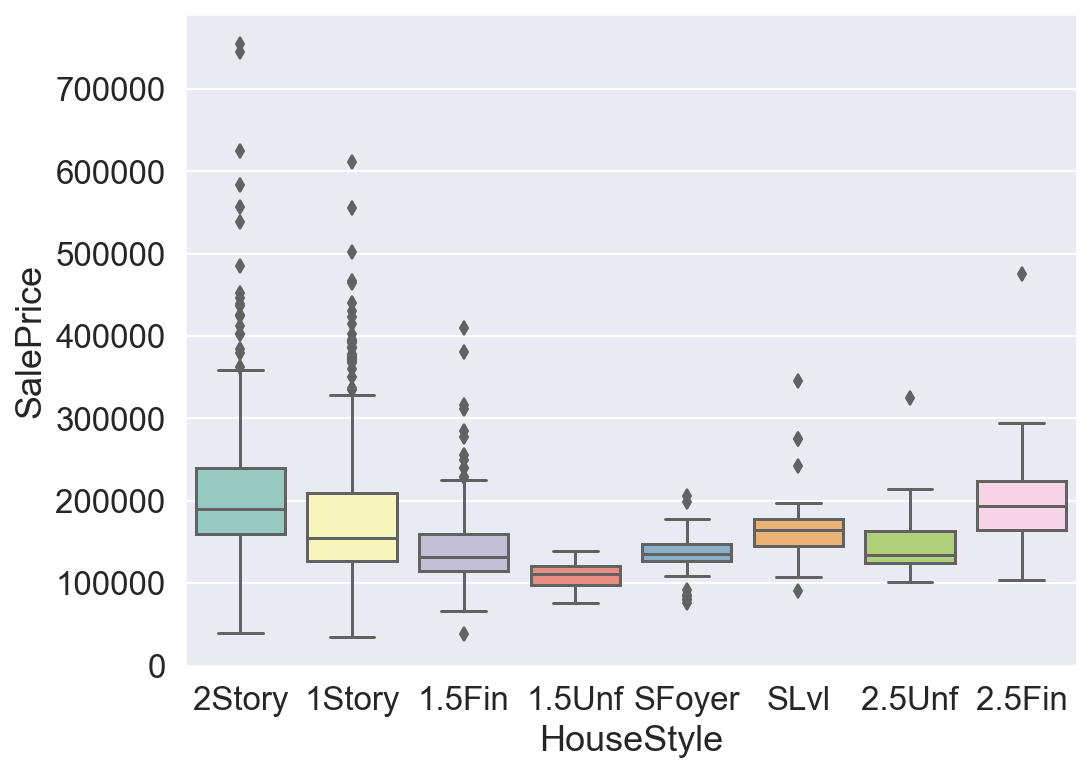

In [89]:
plt.subplots(figsize=(8,6))

# Plot the box plot of HouseStyle by SalePrice in train dataset
sns.boxplot(x= 'HouseStyle', y= 'SalePrice',data= train_b,palette='Set3')
plt.show()

According to the plot, `2Story` and `1Story` have huge variance in sale prices so, those house styles are not stable for prediction.

#### 4. The status of interior finish of the garage per foundation type. (test dataset)

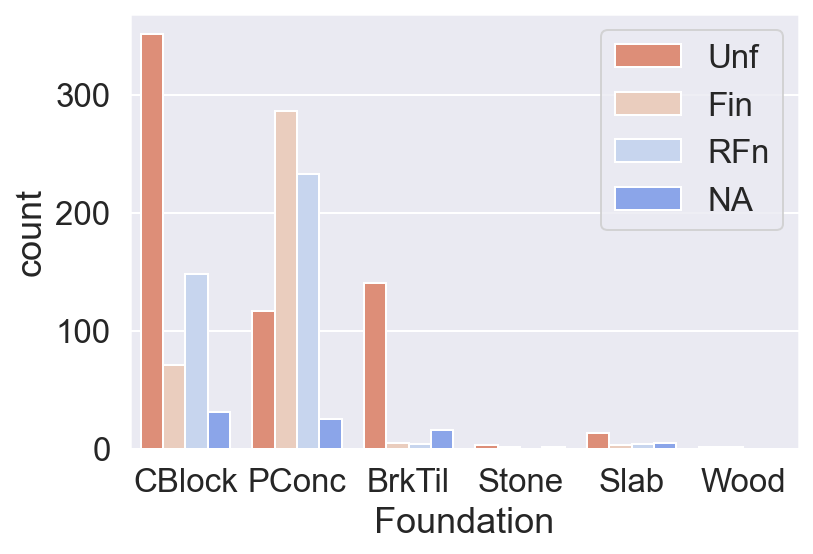

In [90]:
# Plot the count plot of Foundation with grouping by GarageFinish in train dataset
sns.countplot(x='Foundation',hue='GarageFinish',data=test_b,palette='coolwarm_r')
plt.legend(loc='upper right');

According to the plot, `CBlock` has many garages are not finished while garages of `PConc` are almost finished and the rest foundation types like `CBlock`.

#### 5. Which year has the highest average of lot area ? (train dataset)

In [91]:
# Group data by YearBuilt then calculate the mean of lotarea 
train_grouped = train_b.groupby(['YearBuilt']).agg({'LotArea': 'mean'}).sort_values(by=['LotArea'],ascending=False).reset_index()
train_grouped.head(1)

,YearBuilt,LotArea
0,1908,26519.0


The 1908 year has the highest average of lot area due to life style and economical factor like many companies founded such as <a href="https://en.wikipedia.org/wiki/Chuck_Taylor_All-Stars">Converse, Inc.</a>

#### 6. Correlation (train dataset)

In [331]:
# Use corr() function to calculate the correlation between numerical columns
corr_matrix = train_b.corr()

# Change the format of correlation matrix from wide to long format
corr_matrix_unstack = corr_matrix.unstack()

# Sort the rows by correlation coefficient
corr_matrix_sort = corr_matrix_unstack.sort_values().reset_index()

# Show the strong positively correlated columns with the target 'SalePrice'
corr_matrix_sort[(corr_matrix_sort[0]>0.6) & (corr_matrix_sort[0]<1.0)&(corr_matrix_sort.level_0 == 'SalePrice')]

,level_0,level_1,0
1046,SalePrice,1stFlrSF,0.605852
1051,SalePrice,GarageArea,0.623431
1054,SalePrice,OverallQual,0.790982


The overall quality of house has postivly correlated with the sale price so, the higher quality leads to higher sale price.

<br>

### Model Instantiation & Prediction

---

In this section, we develop models to predict sale price and evalute them by cross validation to choose the optimal model for prediction. Then, predict the sale price of house with GridSearchCV to find the best parameters for model. The R Square used as regression evaluation metric.

#### 1. Baseline Prediction (train data)

This section shows the baseline of regression to determine if the model has improvement on prediction.

In [92]:
train_b.SalePrice.mean()

180921.19589041095

Here we have used the mean of target as a baseline because the problem is regression.

#### 2. Scaled Data

In this section, we scaled data to remove the effect of coefficient varinace in datasets.

In [93]:
# Do Scaling for data
Xs_train_a = ss.fit_transform(X_train_a)
Xs_test_a = ss.transform(X_test_a)

#### 3. Linear Regression

##### 3.a Linear Regression with Default Parameters

In [94]:
# Build Linear Regression model 
lr = LinearRegression()

# Fitting the model
lr.fit(Xs_train_a,y_train);

In [95]:
lr.score(Xs_train_a,y_train)

0.8097577755633741

In [101]:
# Perform 5-fold cross validation
scores = cross_val_score(lr,Xs_train_a,y_train,cv=5)
print("Cross-validated scores:", scores)
print("Mean cross-validated scores:", scores.mean())

Cross-validated scores: [0.84627049 0.81130259 0.82241422 0.81741185 0.63305865]
Mean cross-validated scores: 0.7860915616041487


As a result, we try to improve the model by AdaBoost and GridSearchCV.

##### 3.b Linear Regression with AdaBoost and GridSearchCV

In [106]:
# Build AdaBoost Regression model by linear regression with its best parameters
lr_boost = AdaBoostRegressor(base_estimator=lr)

# Define the parameters of GridSearchCV 
params = {
 'n_estimators': [50, 60, 70, 80 ,90 ,100],
 'learning_rate' : [0.01, 0.05, 0.1, 0.5],
 'loss' : ['linear', 'square', 'exponential']
 }

gs_lr = GridSearchCV(lr_boost,
                  params, 
                  scoring='r2',
                  verbose=1,
                 n_jobs=4)

# Fitting the model
gs_lr.fit(Xs_train_a, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 345 out of 360 | elapsed:   16.2s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   16.8s finished


GridSearchCV(estimator=AdaBoostRegressor(base_estimator=LinearRegression()),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 60, 70, 80, 90, 100]},
             scoring='r2', verbose=1)

In [107]:
# Getting the best parameters of estimator
gs_lr.best_params_

{'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 50}

In [260]:
score = gs_lr.score(Xs_train_a, y_train)
score

0.8070500246931854

In [261]:
# Getting the best cross validation score of estimator
cross_value_score = gs_lr.best_score_
cross_value_score

0.7867306453479432

In [262]:
# Define the list which have the best score and cross validation score of each model
best_scores = []

# Add the score and cross validation score of linear regression with AdaBoost and GS_CV to the list
best_scores.append(['LR with AdaBoost and GS_CV',score,cross_value_score])

<br>

#### 4. Lasso

##### 4.a Lasso with Default Parameters

In [110]:
# Build Lasso regression model 
lasso = Lasso()

# Fitting the model
lasso.fit(Xs_train_a, y_train)
lasso.score(Xs_train_a,y_train)

0.8097577693951448

In [111]:
# Perform 5-fold cross validation
scores = cross_val_score(lasso,Xs_train_a,y_train,cv=5)
print("Cross-validated scores:", scores)
print("Mean cross-validated scores:", scores.mean())

Cross-validated scores: [0.84627361 0.81130677 0.82240352 0.81742136 0.63309978]
Mean cross-validated scores: 0.7861010082717744


As a result, we try to improve the model with LassoCV.

##### 4.b LassoCV

In [112]:
# Build LassoCV regression model 
lassocv = LassoCV(alphas=np.logspace(.1, 10, 30),random_state=1,n_jobs=5,verbose=1,cv=5)

# Fitting the model
lassocv.fit(Xs_train_a,y_train)
print('The optimal value for lasso regression alpha is ',lassocv.alpha_)

The optimal value for lasso regression alpha is  677.6953141341254


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
................................................................................................................................................[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
......[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished


In [113]:
# Build Lasso regression model with best alpha 
lr_lassocv = Lasso(alpha=lassocv.alpha_)

# Fitting the model
lr_lassocv.fit(Xs_train_a,y_train)
lr_lassocv.score(Xs_train_a,y_train)

0.8075706380163759

In [114]:
# Perform 5-fold cross validation
scores = cross_val_score(lr_lassocv,Xs_train_a,y_train,cv=5)
print("Cross-validated scores:", scores)
print("Mean cross-validated scores:", scores.mean())

Cross-validated scores: [0.84543539 0.81303129 0.81410927 0.81864663 0.65447606]
Mean cross-validated scores: 0.7891397266935082


Also, we try to improve the model with the best alpha by AdaBoost and GridSearchCV.

##### 4.c LassoCV with AdaBoost and GridSearchCV

In [115]:
# Build AdaBoost Regression model by lasso with its best parameters 
lr_lassocv_boost = AdaBoostRegressor(base_estimator=lr_lassocv,random_state=1)

# Define the parameters of GridSearchCV 
params = {
 'n_estimators': [50, 60, 70, 80 ,90 ,100],
 'learning_rate' : [0.01, 0.05, 0.1, 0.5],
 'loss' : ['linear', 'square', 'exponential']
 }

gs_lr_lassocv = GridSearchCV(lr_lassocv_boost,
                  params, 
                  scoring='r2',
                  verbose=1,
                 n_jobs=5)

# Fitting the model
gs_lr_lassocv.fit(Xs_train_a, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   21.8s
[Parallel(n_jobs=5)]: Done 360 out of 360 | elapsed:   40.1s finished


GridSearchCV(estimator=AdaBoostRegressor(base_estimator=Lasso(alpha=677.6953141341254),
                                         random_state=1),
             n_jobs=5,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 60, 70, 80, 90, 100]},
             scoring='r2', verbose=1)

In [116]:
# Getting the best parameters of estimator
gs_lr_lassocv.best_params_

{'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 60}

In [263]:
score = gs_lr_lassocv.score(Xs_train_a, y_train)
score

0.807894797738714

In [264]:
# Getting the best cross validation score of estimator
cross_value_score = gs_lr_lassocv.best_score_
cross_value_score

0.7902984041138007

In [265]:
# Add the score and cross validation score of lassoCV with AdaBoost and GS_CV to the list
best_scores.append(['LassoCV with AdaBoost and GS_CV',score,cross_value_score])

<br>

#### 5. Ridge

##### 5.a Ridge with Default Parameters

In [119]:
# Build Ridge regression model 
ridge = Ridge()

# Fitting the model
ridge.fit(Xs_train_a, y_train)
ridge.score(Xs_train_a,y_train)

0.8097572593715585

In [120]:
# Perform 5-fold cross validation
scores = cross_val_score(ridge,Xs_train_a,y_train,cv=5)
print("Cross-validated scores:", scores)
print("Mean cross-validated scores:", scores.mean())

Cross-validated scores: [0.8462592  0.81137773 0.82233461 0.81755542 0.63354575]
Mean cross-validated scores: 0.7862145411703546


As a result, we try to improve the model with RidgeCV.

##### 5.b RidgeCV

In [121]:
# Build RidgeCV regression model 
ridgecv = RidgeCV(alphas=np.logspace(.1, 10, 30),scoring='r2',cv=5)
ridgecv.fit(Xs_train_a,y_train)
print('The optimal value for lasso regression alpha is ',ridgecv.alpha_)

The optimal value for lasso regression alpha is  64.10568596420232


In [122]:
# Build Ridge regression model with best alpha 
lr_ridgecv = Ridge(alpha=ridgecv.alpha_)
lr_ridgecv.fit(Xs_train_a,y_train)
lr_ridgecv.score(Xs_train_a,y_train)

0.8084822026027387

In [123]:
# Perform 5-fold cross validation
scores = cross_val_score(lr_ridgecv,Xs_train_a,y_train,cv=5)
print("Cross-validated scores:", scores)
print("Mean cross-validated scores:", scores.mean())

Cross-validated scores: [0.8441519  0.81272127 0.81663649 0.82198252 0.65309073]
Mean cross-validated scores: 0.7897165811812837


Also, we try to improve the model with the best alpha like lasso by AdaBoost and GridSearchCV.

##### 5.c RidgeCV with AdaBoost and GridSearchCV

In [225]:
# Build AdaBoost Regression model by Ridge with its best parameters
lr_ridgecv_boost = AdaBoostRegressor(base_estimator=lr_ridgecv,random_state=1)

# Define the parameters of GridSearchCV 
params = {
 'n_estimators': [50, 60, 70, 80 ,90 ,100],
 'learning_rate' : [0.01, 0.05, 0.1, 0.5],
 'loss' : ['linear', 'square', 'exponential']
 }

gs_lr_ridgecv = GridSearchCV(lr_ridgecv_boost,
                  params, 
                  scoring='r2',
                  verbose=1,
                 n_jobs=5)

# Fitting the model
gs_lr_ridgecv.fit(Xs_train_a, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    2.0s
[Parallel(n_jobs=5)]: Done 360 out of 360 | elapsed:   10.7s finished


GridSearchCV(estimator=AdaBoostRegressor(base_estimator=Ridge(alpha=64.10568596420232),
                                         random_state=1),
             n_jobs=5,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 60, 70, 80, 90, 100]},
             scoring='r2', verbose=1)

In [226]:
# Getting the best parameters of estimator
gs_lr_ridgecv.best_params_

{'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 50}

In [266]:
score = gs_lr_ridgecv.score(Xs_train_a, y_train)
score

0.8093858265301026

In [267]:
# Getting the best cross validation score of estimator
cross_value_score = gs_lr_ridgecv.best_score_
cross_value_score

0.7897217292483288

In [268]:
# Add the score and cross validation score of lassoCV with AdaBoost and GS_CV to the list
best_scores.append(['RidgeCV with AdaBoost and GS_CV',score,cross_value_score])

<br>

#### 6. ElasticNet

##### 6.a ElasticNet with Default Parameters

In [128]:
# Build ElasticNet regression model 
elastic_net = ElasticNet()

# Fitting the model
elastic_net.fit(Xs_train_a,y_train)
elastic_net.score(Xs_train_a,y_train)

0.7811295560796936

In [129]:
# Perform 5-fold cross validation
scores = cross_val_score(elastic_net,Xs_train_a,y_train,cv=5)
print("Cross-validated scores:", scores)
print("Mean cross-validated scores:", scores.mean())

Cross-validated scores: [0.8203051  0.79270905 0.77475173 0.80651895 0.67288498]
Mean cross-validated scores: 0.7734339620417712


As a result, we try to improve the model with ElasticNetCV.

##### 6.b ElasticNetCV

In [133]:
# Build ElasticNetCV regression model 
elastic_netcv = ElasticNetCV(cv=5, random_state=1,l1_ratio=[.3,.6,.9],alphas=np.linspace(0.01, .99, 100),tol=0.1)
elastic_netcv.fit(Xs_train_a,y_train)
print('The optimal value for elastic net regression alpha is %.5f and L1 ratio is %.2f' % (elastic_netcv.alpha_,elastic_netcv.l1_ratio_))

The optimal value for elastic net regression alpha is 0.08919 and L1 ratio is 0.30


In [134]:
# Build ElasticNetCV regression model 
lr_elastic_netcv = ElasticNet(alpha=elastic_netcv.alpha_,l1_ratio=elastic_netcv.l1_ratio_)

# Fitting the model
lr_elastic_netcv.fit(Xs_train_a,y_train)
lr_elastic_netcv.score(Xs_train_a,y_train)

0.8075644910397852

In [135]:
# Perform 5-fold cross validation
scores = cross_val_score(lr_elastic_netcv,Xs_train_a,y_train,cv=5)
print("Cross-validated scores:", scores)
print("Mean cross-validated scores:", scores.mean())

Cross-validated scores: [0.84376483 0.81262432 0.81581496 0.82219179 0.65475014]
Mean cross-validated scores: 0.7898292094544554


Also, we try to improve the model with the best alpha and L1 ratio by AdaBoost and GridSearchCV.

##### 6.c ElasticNetCV with AdaBoost and GridSearchCV

In [136]:
# Build AdaBoost Regression model by ElasticNet with its best parameters
lr_elastic_netcv_boost = AdaBoostRegressor(base_estimator=lr_elastic_netcv,random_state=1)

# Define the parameters of GridSearchCV 
params = {
 'n_estimators': [50, 60, 70, 80 ,90 ,100],
 'learning_rate' : [0.01, 0.05, 0.1, 0.5],
 'loss' : ['linear', 'square', 'exponential']
 }

gs_lr_elastic_netcv = GridSearchCV(lr_elastic_netcv_boost,
                  params, 
                  scoring='r2',
                  verbose=1,
                 n_jobs=5)

# Fitting the model
gs_lr_elastic_netcv.fit(Xs_train_a, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    4.5s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   29.2s
[Parallel(n_jobs=5)]: Done 360 out of 360 | elapsed:  1.0min finished


GridSearchCV(estimator=AdaBoostRegressor(base_estimator=ElasticNet(alpha=0.08919191919191918,
                                                                   l1_ratio=0.3),
                                         random_state=1),
             n_jobs=5,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 60, 70, 80, 90, 100]},
             scoring='r2', verbose=1)

In [137]:
# Getting the best parameters of estimator
gs_lr_elastic_netcv.best_params_

{'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 60}

In [269]:
score = gs_lr_elastic_netcv.score(Xs_train_a, y_train)
score

0.8068633290558217

In [270]:
# Getting the best cross validation score of estimator
cross_value_score = gs_lr_elastic_netcv.best_score_
cross_value_score

0.7898993202294112

In [271]:
# Add the score and cross validation score of ElasticNetCV with AdaBoost and GS_CV to the list
best_scores.append(['ElasticNetCV with AdaBoost and GS_CV',score,cross_value_score])

#### 7. K-Nearest Neighbors

##### 7.a K-Nearest Neighbors with Default Parameters

In [140]:
# Build KNN regression model 
knn = KNeighborsRegressor()

# Fitting the model
knn.fit(Xs_train_a, y_train)
knn.score(Xs_train_a,y_train)

0.852155919359397

In [141]:
# Perform 5-fold cross validation
scores = cross_val_score(knn,Xs_train_a,y_train,cv=5)
print("Cross-validated scores:", scores)
print("Mean cross-validated scores:", scores.mean())

Cross-validated scores: [0.80056409 0.72309892 0.78866003 0.78914733 0.71679028]
Mean cross-validated scores: 0.7636521310429947


As a result, we try to improve the model with GridSearchCV.

##### 7.b K-Nearest Neighbors with GridSearchCV

In [142]:
# Define the parameters of GridSearchCV 
param_grid = {
    'n_neighbors': np.linspace(2,12,num=12,dtype=int),
    'metric': ['minkowski','euclidean']
}

gs_knn = GridSearchCV(knn, 
                  param_grid, 
                  cv=5,
                  scoring='r2',
                  verbose=1,
                 n_jobs=3)

# Fitting the model
gs_knn.fit(Xs_train_a, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done 103 tasks      | elapsed:    3.0s
[Parallel(n_jobs=3)]: Done 120 out of 120 | elapsed:    3.1s finished


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=3,
             param_grid={'metric': ['minkowski', 'euclidean'],
                         'n_neighbors': array([ 2,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])},
             scoring='r2', verbose=1)

In [143]:
# Getting the best parameters of estimator
gs_knn.best_params_

{'metric': 'minkowski', 'n_neighbors': 8}

In [144]:
gs_knn.score(Xs_train_a,y_train)

0.8196361776220711

In [145]:
# Getting the best cross validation score of estimator
gs_knn.best_score_

0.7651565371999934

Also, we try to improve the model with the its best parameters by AdaBoost and GridSearchCV.

##### 7.c K-Nearest Neighbors with AdaBoost and GridSearchCV

In [146]:
# Build K-Nearest Neighbors Regression model with its best parameters 
knn_best = KNeighborsRegressor(metric='minkowski', n_neighbors=8)
knn_best.fit(Xs_train_a,y_train)

# Build AdaBoost Regression model by optimezed K-Nearest Neighbors Regression
knn_boost = AdaBoostRegressor(base_estimator=knn_best,random_state=1)

# Define the parameters of GridSearchCV 
params = {
 'n_estimators': [50, 75 ,100],
 'learning_rate' : [0.01, 0.05, 0.1, 0.5],
 'loss' : ['linear', 'square', 'exponential']
 }

gs_knn = GridSearchCV(knn_boost,
                  params, 
                  scoring='r2',
                  verbose=1,
                 n_jobs=5)

# Fitting the model
gs_knn.fit(Xs_train_a, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  2.6min
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed: 12.2min finished


GridSearchCV(estimator=AdaBoostRegressor(base_estimator=KNeighborsRegressor(n_neighbors=8),
                                         random_state=1),
             n_jobs=5,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 75, 100]},
             scoring='r2', verbose=1)

In [147]:
# Getting the best parameters of estimator
gs_knn.best_params_

{'learning_rate': 0.05, 'loss': 'linear', 'n_estimators': 100}

In [272]:
score = gs_knn.score(Xs_train_a,y_train)
score

0.9108279318501135

In [273]:
# Getting the best cross validation score of estimator
cross_value_score = gs_knn.best_score_
cross_value_score

0.7910987996769849

In [274]:
# Add the score and cross validation score of KNN with AdaBoost and GS_CV to the list
best_scores.append(['KNN with AdaBoost and GS_CV',score,cross_value_score])

<br>

#### 8. Decision Tree

##### 8.a Decision Tree with Default Parameters

In [150]:
# Build Decision Tree regression model 
dtr = DecisionTreeRegressor()

# Fitting the model
dtr.fit(Xs_train_a, y_train)
dtr.score(Xs_train_a,y_train)

0.9999962591950825

In [151]:
# Perform 5-fold cross validation
scores = cross_val_score(dtr,Xs_train_a,y_train,cv=5)
print("Cross-validated scores:", scores)
print("Mean cross-validated scores:", scores.mean())

Cross-validated scores: [0.69029415 0.7337728  0.76721299 0.63523688 0.71210059]
Mean cross-validated scores: 0.707723481266165


As a result, we try to reduce the overfit of model by Bagging and GridSearchCV.

##### 8.b Decision Tree with Bagging and GridSearchCV

In [152]:
dtr_bagging = BaggingRegressor(base_estimator=DecisionTreeRegressor(),random_state=1)

# Define the parameters of GridSearchCV 
param_grid = {
    'n_estimators': np.linspace(10,100,num=10,dtype=int),
    'max_features' : np.linspace(0.1,0.9,num=9),
    'max_samples' : [0.3,0.4,0.5,0.6, 0.7, 0.8, 0.9],
}

gs_dtr = GridSearchCV(dtr_bagging, 
                  param_grid, 
                  cv=5,
                  scoring='r2',
                  verbose=1,
                 n_jobs=5)

# Fitting the model
gs_dtr.fit(Xs_train_a, y_train)

Fitting 5 folds for each of 630 candidates, totalling 3150 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 310 tasks      | elapsed:   16.2s
[Parallel(n_jobs=5)]: Done 640 tasks      | elapsed:   46.0s
[Parallel(n_jobs=5)]: Done 990 tasks      | elapsed:  1.4min
[Parallel(n_jobs=5)]: Done 1440 tasks      | elapsed:  2.3min
[Parallel(n_jobs=5)]: Done 1990 tasks      | elapsed:  3.7min
[Parallel(n_jobs=5)]: Done 2640 tasks      | elapsed:  5.5min
[Parallel(n_jobs=5)]: Done 3150 out of 3150 | elapsed:  7.4min finished


GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                                        random_state=1),
             n_jobs=5,
             param_grid={'max_features': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_samples': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])},
             scoring='r2', verbose=1)

In [153]:
# Getting the best parameters of estimator
gs_dtr.best_params_

{'max_features': 0.8, 'max_samples': 0.8, 'n_estimators': 40}

In [275]:
score = gs_dtr.score(Xs_train_a,y_train)
score

0.972777447946511

In [276]:
# Getting the best cross validation score of estimator
cross_value_score = gs_dtr.best_score_
cross_value_score

0.8576965796197598

In [277]:
# Add the score and cross validation score of KNN with AdaBoost and GS_CV to the list
best_scores.append(['DT with Bagging and GS_CV',score,cross_value_score])

<br>

#### 9. Random Forest

##### 9.a Random Forest with Default Parameters

In [360]:
# Build Random Forest regression model 
rf = RandomForestRegressor(random_state=1)

# Fitting the model
rf.fit(Xs_train_a,y_train)
rf.score(Xs_train_a,y_train)

0.9801120485694279

In [366]:
# Perform 5-fold cross validation
scores = cross_val_score(rf,Xs_train_a,y_train,cv=5)
print("Cross-validated scores:", scores)
print("Mean cross-validated scores:", scores.mean())

Cross-validated scores: [0.86714986 0.82615083 0.84952097 0.85040615 0.81322403]
Mean cross-validated scores: 0.8412903671219192


As a result, we try to reduce the overfit of model by GridSearchCV.

##### 9.b Random Forest with GridSearchCV

In [374]:
rf = RandomForestRegressor(random_state=1)

# Define the parameters of GridSearchCV 
param_grid = {
    'n_estimators': np.linspace(80, 130, num=6,dtype=int),
    'max_features' : [0.6,0.7,0.8],
    'max_depth': np.linspace(1,5,num=5,dtype=int),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf' : [1,2,4]
}

gs_rf = GridSearchCV(rf, 
                  param_grid, 
                  cv=5,
                  scoring='r2',
                  verbose=1,
                 n_jobs=5)

# Fitting the model
gs_rf.fit(Xs_train_a, y_train)

Fitting 5 folds for each of 810 candidates, totalling 4050 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    5.6s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   18.1s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:   44.9s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:  1.4min
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:  2.4min
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:  3.7min
[Parallel(n_jobs=5)]: Done 2440 tasks      | elapsed:  5.4min
[Parallel(n_jobs=5)]: Done 3190 tasks      | elapsed:  7.8min
[Parallel(n_jobs=5)]: Done 4040 tasks      | elapsed: 10.7min
[Parallel(n_jobs=5)]: Done 4050 out of 4050 | elapsed: 10.8min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1), n_jobs=5,
             param_grid={'max_depth': array([1, 2, 3, 4, 5]),
                         'max_features': [0.6, 0.7, 0.8],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': array([ 80,  90, 100, 110, 120, 130])},
             scoring='r2', verbose=1)

In [358]:
gs_rf.score(Xs_train_a,y_train)

0.8843336804702284

In [356]:
# Getting the best parameters of estimator
gs_rf.best_params_

{'max_depth': 5,
 'max_features': 0.6,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 60}

In [359]:
# Getting the best cross validation score of estimator
gs_rf.best_score_

0.8122653579815469

In [280]:
score = rf.score(Xs_train_a,y_train)
cross_value_score = scores.mean()

# Add the score and cross validation score of KNN with AdaBoost and GS_CV to the list
best_scores.append(['RF with Default Parameters',score,cross_value_score])

<br>

#### 10. ExtraTree

##### 10.a ExtraTree with Customized Parameters

In [165]:
# Build ExtraTree regression model 
etr = ExtraTreesRegressor(n_estimators=5,random_state=1)
etr.fit(Xs_train_a,y_train)
etr.score(Xs_train_a,y_train)

0.9999962591950825

In [166]:
# Perform 5-fold cross validation
scores = cross_val_score(etr,Xs_train_a,y_train,cv=5)
print("Cross-validated scores:", scores)
print("Mean cross-validated scores:", scores.mean())

Cross-validated scores: [0.85373011 0.81215668 0.83322453 0.85681364 0.79708232]
Mean cross-validated scores: 0.8306014566441442


As a result, we try to reduce the overfit of model by GridSearchCV.

##### 10.b ExtraTree with GridSearchCV

In [377]:
# Define the parameters of GridSearchCV 
param_grid = {
    'n_estimators': np.linspace(10,100,num=10,dtype=int),
    'max_features' : np.linspace(0.1,0.9,num=9),
    'max_samples' : np.linspace(0.3, 0.9,num=7),
}

gs_etr = GridSearchCV(etr, 
                  param_grid, 
                  cv=5,
                  scoring='r2',
                  verbose=1,
                 n_jobs=5)

# Fitting the model
gs_etr.fit(Xs_train_a, y_train)

Fitting 5 folds for each of 630 candidates, totalling 3150 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 310 tasks      | elapsed:   16.9s
[Parallel(n_jobs=5)]: Done 610 tasks      | elapsed:   43.7s
[Parallel(n_jobs=5)]: Done 960 tasks      | elapsed:  1.3min
[Parallel(n_jobs=5)]: Done 1410 tasks      | elapsed:  2.2min
[Parallel(n_jobs=5)]: Done 1960 tasks      | elapsed:  3.4min
[Parallel(n_jobs=5)]: Done 2610 tasks      | elapsed:  5.1min
[Parallel(n_jobs=5)]: Done 3150 out of 3150 | elapsed:  6.8min finished


GridSearchCV(cv=5,
             estimator=ExtraTreesRegressor(n_estimators=5, random_state=1),
             n_jobs=5,
             param_grid={'max_features': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_samples': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])},
             scoring='r2', verbose=1)

In [380]:
# Getting the best parameters of estimator
gs_etr.best_params_

{'max_features': 0.4, 'max_samples': 0.3, 'n_estimators': 70}

In [381]:
score = gs_etr.score(Xs_train_a,y_train)
score

0.9999962586520712

In [379]:
# Getting the best cross validation score of estimator
cross_value_score = gs_etr.best_score_
cross_value_score

0.8613865752760737

In [283]:
# Add the score and cross validation score of ET with GS_CV to the list
best_scores.append(['ET with Bagging',score,cross_value_score])

<br>

#### 11. Gradient Boosting

##### 11.a Gradient Boosting with Default Parameters

In [171]:
# Build Gradient Boosting regression model 
gbr = GradientBoostingRegressor()

# Fitting the model
gbr.fit(Xs_train_a,y_train)
gbr.score(Xs_train_a,y_train)

0.9556980760265507

In [172]:
# Perform 5-fold cross validation
scores = cross_val_score(gbr,Xs_train_a,y_train,cv=5)
print("Cross-validated scores:", scores)
print("Mean cross-validated scores:", scores.mean())

Cross-validated scores: [0.89218022 0.82638427 0.88602332 0.86815948 0.84728247]
Mean cross-validated scores: 0.8640059509941951


As a result, we try to reduce the overfit of model by GridSearchCV.

##### 11.b Gradient Boosting with GridSearchCV

In [248]:
gbr = GradientBoostingRegressor(random_state=1)

# Define the parameters of GridSearchCV 
param_grid = {
    'learning_rate': np.linspace(0.01,0.1,10),
    'subsample'    : np.linspace(0.5,0.9,4),
    'n_estimators' : np.linspace(50,200,4,dtype=int),
    'max_depth'    : np.linspace(1,5,5,dtype=int)
}

gs_gbr = GridSearchCV(gbr,
                  param_grid, 
                  cv=5,
                  scoring='r2',
                  verbose=1,
                 n_jobs=5)

# Fitting the model
gs_gbr.fit(Xs_train_a, y_train)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:  4.5min finished


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
                         'max_depth': array([1, 2, 3, 4, 5]),
                         'n_estimators': array([ 50, 100, 150, 200]),
                         'subsample': array([0.5       , 0.63333333, 0.76666667, 0.9       ])},
             scoring='r2', verbose=1)

In [174]:
# Getting the best parameters of estimator
gs_gbr.best_params_

{'learning_rate': 0.05000000000000001,
 'max_depth': 5,
 'n_estimators': 200,
 'subsample': 0.5}

In [284]:
score = gs_gbr.score(Xs_train_a,y_train)
score

0.9832644688720472

In [285]:
# Getting the best cross validation of estimator
cross_value_score = gs_gbr.best_score_
cross_value_score

0.8745938510971254

In [286]:
# Add the score and cross validation score of Gradient Boosting with GS_CV to the list
best_scores.append(['Gradient Boosting with GS_CV',score,cross_value_score])

<br>

#### 12. Choose The Optimal Model

<i>note:</i>
- LR : Linear Regression
- GS_CV : GridSearchCV
- KNN : K-Nearest Neighbors
- DT : Decision Tree
- RF : Random Forest
- ET : ExtraTree

In [287]:
# Define the dataframe contains the best score and cross validation score in each model
best_scores_df = pd.DataFrame(best_scores, columns=['Model','Score','Cross Validation Score'])
best_scores_df

,Model,Score,Cross Validation Score
0,LR with AdaBoost and GS_CV,0.807050,0.786731
1,LassoCV with AdaBoost and GS_CV,0.807895,0.790298
2,RidgeCV with AdaBoost and GS_CV,0.809386,0.789722
3,ElasticNetCV with AdaBoost and GS_CV,0.806863,0.789899
4,KNN with AdaBoost and GS_CV,0.910828,0.791099
5,DT with Bagging and GS_CV,0.972777,0.857697
6,RF with with Default Parameters,0.978509,0.844624
7,ET with Bagging,0.968401,0.856155
8,Gradient Boosting with GS_CV,0.983264,0.874594


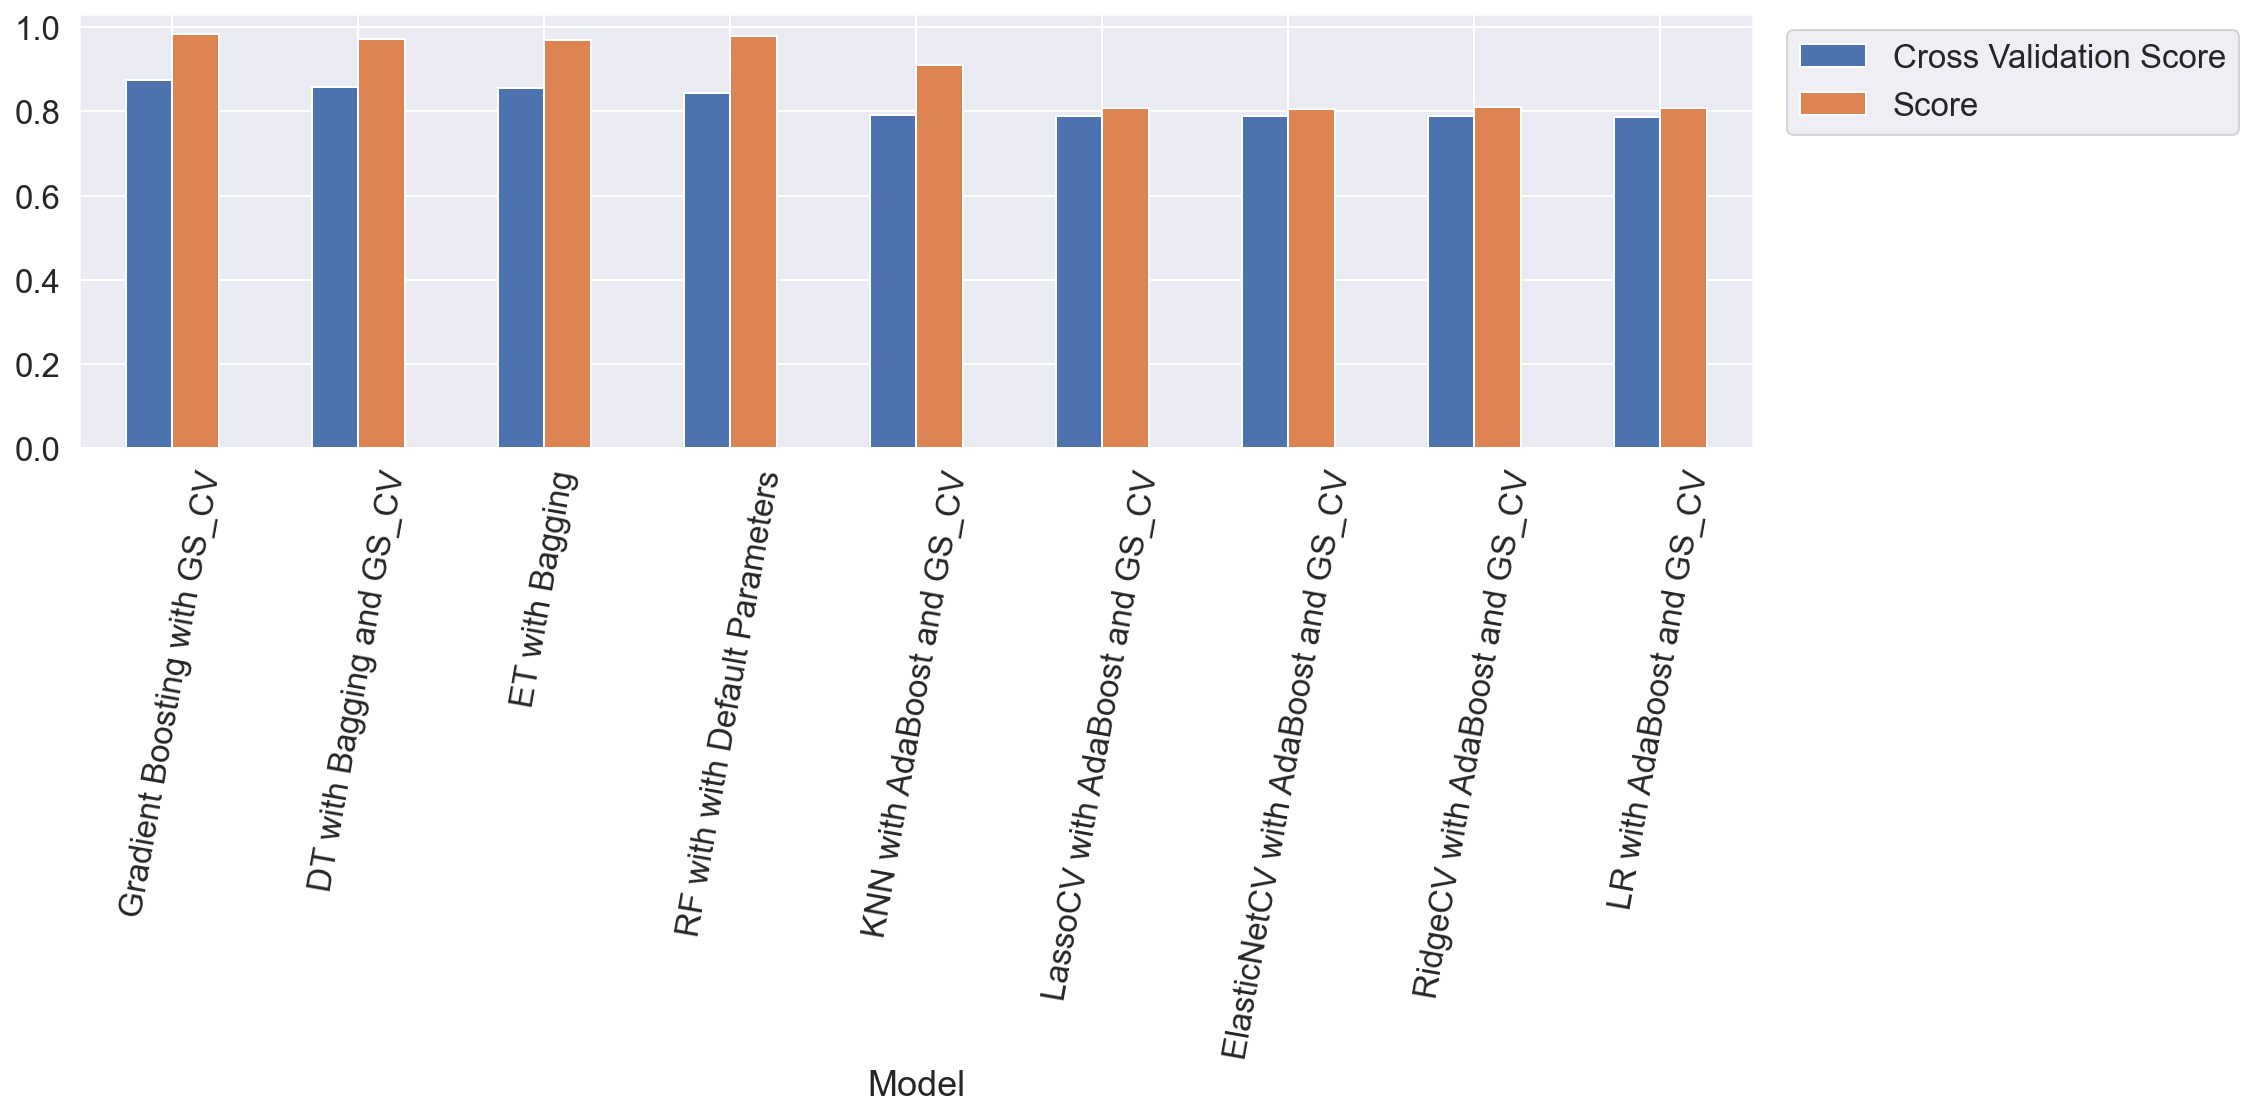

In [320]:
# Define the subplots with specific figsize
fig, ax = plt.subplots(figsize=(15,4))

# Sort the best scores dataframe by Cross Validation Score
sort_best_score_df = best_scores_df.sort_values('Cross Validation Score',ascending=False)

# Plot the Cross Validation Score and Score per model by bar plot
plot = sort_best_score_df.plot(kind="bar",x='Model',y=['Cross Validation Score', 'Score'],sort_columns=True,ax=ax)

# Rotate the x tick labels by 90 degree
plt.setp(plot.get_xticklabels(), rotation=80)

# Assign location of lengend to the right corner
plt.legend(loc='upper right',bbox_to_anchor=(1.30, 1), ncol=1);

According to the plot, we have choosen the `Gradient Boosting with GridSearchCV` due to the cross validation score which is the highest score.

In [328]:
filename = 'finalized_gs_gbr_model.sav'

# Save the optimal model
pickle.dump(gs_gbr, open(filename, 'wb'))

#### 13. Predict The house Prices

In [326]:
# Predict the sale price of test dataset
pred_prices = gs_gbr.predict(Xs_test_a)

# Define the dataframe to save the result as .CSV file
final_outcome = pd.DataFrame(pred_prices,columns=['SalePrice'],index=test.Id)
final_outcome.to_csv('../data-housepricing/predicted_SalePrice.csv')

<br>

<h3>Conclusions and Recommendations</h3>

<p style="text-align:justify">The various of factors have a huge impact on house prices. The overall quality impact has appeared in datasets. Also, the overall quality and floor area are the top 3 important factors in the prediction. So, the house price will be increased by increasing the overall quality. The findings in the training dataset prove the previous fact since the correlation coefficient is strong positively by 0.79. The recommendations are focusing on lot, floor, garage area and frontage lot within the overall quality when buying the house. Therefore, the house prices will be more predictable without considering every single factor that might not affect the price. Those recommendations will provide a clear view of the house and how will be estimated while the developed model automates those process to save time on deciding and predicts the sale price.</p>

<br><h3>Kaggle Competition</h3>

<img src="house_pricing_best_score.JPG"></img>

The notebook in Kaggle <a href="https://www.kaggle.com/mo7mmedcs/house-sale-price-prediction">Click Here</a>